# Sentiment Analysis of Steam Reviews Using Deep Neural Networks

## Introduction

### Problem Definition
As digital platforms continue to grow rapidly, user-generated content has become a crucial component of online services. Steam, a top digital distribution platform for video games, hosts a large and active community where users express their thoughts and share experiences through reviews. However, the vast number of reviews makes it impractical to manually evaluate the sentiment behind each one. The key challenge is to automatically determine whether a user recommends a game based on their review text. This process, known as sentiment analysis, involves categorizing reviews as either positive or negative based on their content. Such analysis is valuable not only for understanding user preferences but also for predicting the future success of games.

### Motivation
The ability to automatically determine the sentiment of a game review is invaluable for several reasons. Firstly, it provides game developers and publishers with real-time insights into user satisfaction and areas requiring improvement. According to Comscore's 2023 State of Gaming report, the global gaming market continues to expand, with user-generated content like reviews playing a crucial role in shaping game development and marketing strategies [1]. Secondly, sentiment analysis helps potential buyers quickly gauge the overall reception of a game, which is vital given that 58% of adults now play games on at least one device weekly [2]. Lastly, by automating sentiment analysis, Steam can efficiently manage and categorize vast amounts of user reviews, enhancing the user experience by promoting more relevant content. This system could also be extended to extract and analyze reviews from other platforms, offering a comprehensive view of a game's popularity across the internet.

### Dataset
The dataset used for this sentiment analysis is sourced from Kaggle, an open-source platform for various datasets, consisting of reviews from Steam, a popular video game distribution service [3]. It includes reviews for 64 different game titles, with each entry containing a unique review ID, the title of the game, the year the review was posted, the full text of the review, and the user's recommendation. The recommendation is the target variable, where a value of '1' indicates that the users recommend the game, and '0' indicates that they do not. This dataset provides a rich source of information for training a machine learning model to predict the sentiment of a review based on its text and other features.

### Objectives
The primary objectives of this project include:
1. **Data preprocessing**: To preprocess and prepare the dataset, ensuring data quality and suitability for model training by handling missing values, encoding categorical variables, and normalizing features.
2. **Model Development**: To implement and evaluate various machine learning models, including baseline models and more advanced neural network architectures, to identify the most effective approach for the given task.
3. **Model Optimization**: To optimize model performance through hyperparameter tuning, employing techniques such as cross-validation, regularization, and early stopping to prevent overfitting and enhance generalization.
4. **Model Performance**: To assess model performance using a combination of evaluation metrics (e.g., accuracy, F1 score, AUC-ROC) and validation techniques (e.g., K-fold cross-validation, hold-out validation set) to ensure robust and reliable predictions.
5. **Architectural Exploration**: Explore different neural network architectures, including varying the number of hidden layers and experimenting with different activation functions, to determine the most effective model configuration for the dataset.

## Methodology

### a) Data Loading and Preprocessing

#### Data Loading

In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

steam_review_data = pd.read_csv(r"G:\UOL BSc Comp Sci\Y3S1\ML & Neural Networks\Final Assessment\steam_reviews\train.csv")
steam_review_data

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


In [2]:
print(steam_review_data.isnull().sum())

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64


#### Data Preprocessing 
Since there are missing values under the 'year' section, it is not adviceable to remove rows containing the missing values which might lead to removal of the corresponding 'user_suggestion' values, affecting the analysis and evaluation of the target variable. Thus, one way to handle missing data like these is to input them in the 'year' column with the median year of the reviews.

In [3]:
median_year = steam_review_data['year'].median()

steam_review_data['year'].fillna(median_year, inplace=True)

print(steam_review_data['year'].isnull().sum())

0


A '**preprocess_text**' function is defined to convert text data to lowercase, removes punctuation, eliminates stopwords, and applies lemmatization. The sentiment labels are converted into numerical form using label encoding (**LabelEncoder**) and then one-hot encoded. After splitting the dataset into training, validation and test sets, **sklearn's TfidfVectorizer** is finally used to convert textual data into numerical features based on term frequency-inverse document frequency (TF-IDF), and the resulting shapes of the data are printed for verification. 

In [4]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical

import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initalize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(review):
    # Convert to lowercase
    review = review.lower()
    # Remove punctuation and special characters
    review = re.sub(r'\W', ' ', review)
    # Remove stop words and apply lemmatization
    review = ' '.join([lemmatizer.lemmatize(word) for word in review.split() if word not in stop_words])
    return review

# Apply preprocessing to the 'user_review' column
steam_review_data['cleaned_review'] = steam_review_data['user_review'].apply(preprocess_text)

# Label encoding to convert the 'user_suggestion' into numerical form
label_encoder = LabelEncoder()
y = to_categorical(label_encoder.fit_transform(steam_review_data['user_suggestion']))

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(steam_review_data['cleaned_review'], y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Text Vectorization using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_val_tfidf = tfidf.transform(X_val).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Output shapes for verification
X_train_tfidf.shape, X_val_tfidf.shape, X_test_tfidf.shape

((10496, 5000), (3499, 5000), (3499, 5000))

### b) Choosing a measure of success

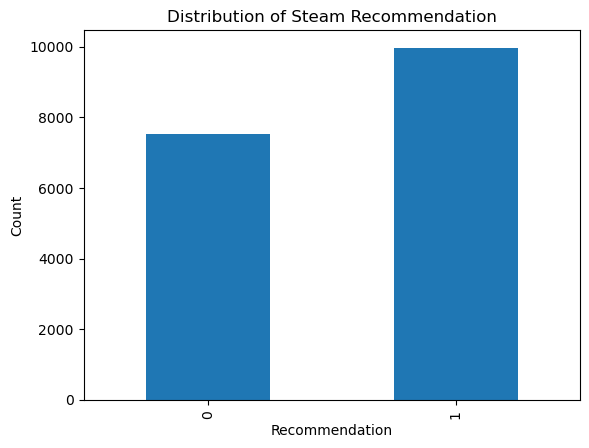

1    9968
0    7526
Name: user_suggestion, dtype: int64


In [5]:
steam_review_data['user_suggestion'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.title('Distribution of Steam Recommendation')
plt.show()

review_counts = steam_review_data['user_suggestion'].value_counts()
print(review_counts)

The distribution of the target variable 'user_suggestion' (whether a user recommends a game) is approximately 57% positive (recommended) and 43% negative (not recommended). Although there is a slight skew towards positive reviews, the dataset is still relatively balanced.

#### Metrics

The F1-score is particularly useful when providing a balanced view of the model's ability to correctly classify both positive and negative reviews. 

$$ F1 = 2 * {Precision(P) * Recall(R) \over Precision(P) + Recall(R)} $$

Precision focuses on how reliable the model's positive predictions are, which is important if the cost of false positives (incorrectly predicting a positive review) is high.

$$ Precision = {True ~ Positive ~ (TP) \over True ~ Positive ~ (TP) + False ~ Positive ~ (FP)} $$

Recall (Sensitivity) measures the model's performance to identify all positive reviews, which is essential if it is crucial not to miss out any recommendations.

$$ Recall = {True ~ Positive ~ (TP) \over True ~ Positive ~ (TP) + False ~ Negative ~ (FN)} $$

The Area Under the Receiver Operating Characteristic Curve (AUC-ROC) gives a view of how well the model can distinguish between recommendations and non-recommendations, regardless of class imbalance.

Given the slight imbalance in the dataset and the importance of balancing both false positives and false negatives in predicting user recommendations, the F1-score is ultimately chosen as the measure of success. It provides a single, balanced metric that captures both precision and recall, ensuring that the model performs well across both positive and negative classes.

Also, AUC-ROC is also monitored alongside the F1-score as a secondary metric as it gives insights into the model’s overall ability to discriminate between the two classes, which is essential for understanding how well the model might perform across different thresholds.

## Deciding on an Evaluation protocol

To ensure a thorough and reliable evaluation of our model, we employed a hybrid approach that integrates K-fold cross-validation with a separate validation set. The K-fold cross-validation was utilized to assess the model's ability to generalize across different subsets of the data, minimizing the likelihood of overfitting and ensuring that the model's performance is not overly dependent on any single portion of the data. By systematically rotating through different folds, we gain a comprehensive understanding of the model's behavior across varied data splits. Additionally, after selecting the optimal hyperparameters through cross-validation, we validated the final model on a dedicated hold-out validation set. This approach allows us to assess the model's performance on completely unseen data, providing a robust estimate of how it would perform in real-world scenarios. This combination of evaluation techniques ensures that our model is both well-tuned and generalizable, balancing the need for rigorous testing with the practical requirement of predictive accuracy on new data.

## Gaining statistical power

### Developing a model that does better than a baseline

#### Naive Baseline

To provide a basic reference point to evaluate the model's performance, the Majority Class Baseline (Most Frequent Class) is used as the most appropriate naive baseline. It always predicts the most frequent class in the dataset (either 0 or 1), setting a clear performance benchmark. 

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

majority_class_model = DummyClassifier(strategy='most_frequent')
majority_class_model.fit(X_train_tfidf, y_train.argmax(axis=1))
y_pred_majority = majority_class_model.predict(X_val_tfidf)

# Evaluate the model
accuracy_majority = accuracy_score(y_val.argmax(axis=1), y_pred_majority)
f1_majority = f1_score(y_val.argmax(axis=1), y_pred_majority, average='macro')
roc_auc_majority = roc_auc_score(y_val, to_categorical(y_pred_majority), average='macro', multi_class='ovo')

# Display the evaluation metrics
print(f"Naive Baseline - Majority Class Prediction")
print(f"Accuracy: {accuracy_majority: .2f}")
print(f"F1 Score: {f1_majority: .2f}")
print(f"AUC-ROC: {roc_auc_majority: .2f}")

Naive Baseline - Majority Class Prediction
Accuracy:  0.57
F1 Score:  0.36
AUC-ROC:  0.50


#### Baseline model

A Multi-Layer Perceptron (MLP) is chosen as a better model than the naive baseline as it can learn complex patterns and relationships in the data, while the naive baseline only predicts the most frequent class, offering no insight into the features. The MLP model is compiled with binary crossentropy loss and evaluated using accuracy, F1 score and AUC-ROC. It serves as a baseline to simply understand the performance without implementing complicated techniques, making it capable of handling more complex tasks.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC, F1Score

# Define model parameters
output_classes = y_train.shape[1]
learning_rate = 0.0001
batch_size = 64
epochs = 25

baseline = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)), 
    Dense(output_classes, activation='sigmoid')  # Sigmoid for binary classification
])
    
# Compile the baseline model
baseline.compile(optimizer=Adam(learning_rate=learning_rate), 
                 loss='binary_crossentropy', 
                 metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])


# Train the baseline model
early_stop = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=3, verbose=0)
baseline_history = baseline.fit(X_train_tfidf, 
                                y_train, 
                                epochs=epochs, 
                                batch_size=batch_size, 
                                validation_data=(X_val_tfidf, y_val),
                                callbacks=[early_stop],
                                verbose=0)

# Evaluate baseline model
baseline_scores = baseline.evaluate(X_val_tfidf, y_val, verbose=0)
print(f"Baseline Model")
print(f"Accuracy: {baseline_scores[1]:.2f}")
print(f"F1 Score: {baseline_scores[2]:.2f}")
print(f"AUC-ROC: {baseline_scores[3]:.2f}")

C:\Users\Marcus Tan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Baseline Model
Accuracy: 0.86
F1 Score: 0.86
AUC-ROC: 0.93


### Baseline Model Training History

A helper function ('**plot_training_history**') is defined for continuous tracking of performance across epochs, providing a clear picture of how the model improves or deteriorates during training. By visualizing metrics such as loss, accuracy, F1 score, and AUC for both the training and validation sets, one can assess the model’s learning behavior. It is particularly useful for detecting issues like overfitting, where the model performs well on the training data but poorly on validation data.

The use of early stopping further ensures the model does not overfit or make any irrelevant patterns, by halting training when the validation performance stops improving. It also saves computational resources by avoiding unnecessary epochs and maintains the best model weights for optimal performance. In this scenario, early stopping has occured after the 4th epoch, showing that the model genralizes well while being resource-efficient.

In [8]:
def plot_training_history(history):
    """
    Plots the training and validation metrics over epochs.

    Parameters:
    history : History object
        The history object returned by the `fit` method of a Keras model.
    """
    # Plot training & validation loss values
    plt.figure(figsize=(12, 10))

    # Plot Loss
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    # Plot Accuracy
    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot F1 Score
    plt.subplot(2, 2, 3)
    plt.plot(history.history['f1_score'], label='Training F1 Score')
    plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
    plt.title('Model F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend(loc='lower right')

    # Plot AUC
    plt.subplot(2, 2, 4)
    plt.plot(history.history['auc'], label='Training AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title('Model AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

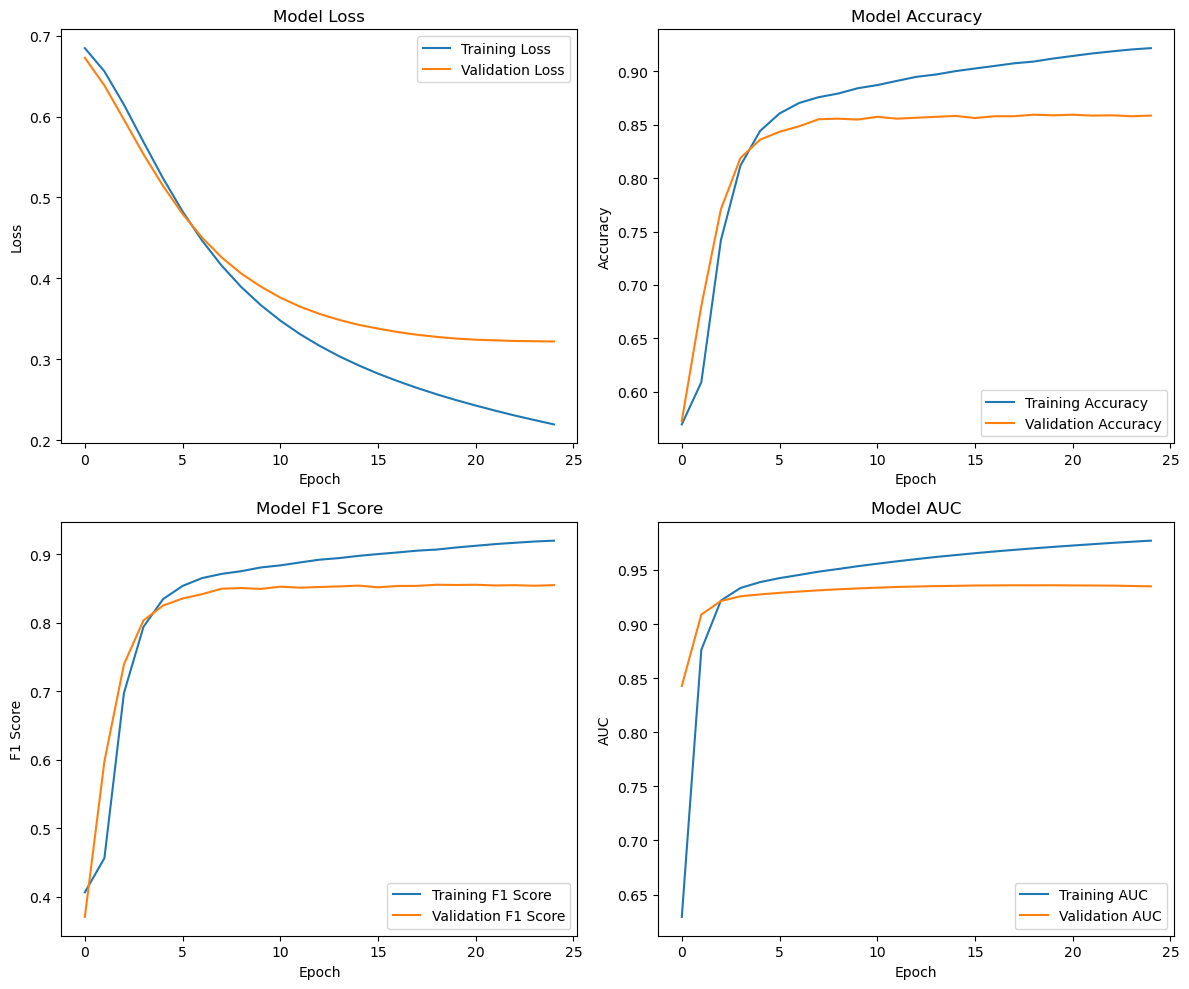

In [9]:
plot_training_history(baseline_history)

#### Performance Summary Table

In [10]:
baselines_perf = {
    "Model": ["Naive Baseline", "Baseline"],
    "Accuracy": [accuracy_majority, baseline_scores[1]], 
    "F1 Score": [f1_majority, baseline_scores[2]], 
    "AUC": [roc_auc_majority, baseline_scores[3]]
}

baselines_perf_df = pd.DataFrame(baselines_perf)
baselines_perf_df

,Model,Accuracy,F1 Score,AUC
0,Naive Baseline,0.569591,0.362891,0.500000
1,Baseline,0.858531,0.855079,0.934837


According to the summary table, the baseline model on the validation set has an accuracy of 0.86, an F1 score of 0.85 and an AUC of 0.93. This shows that its performance significantly outperforms the naive baseline model (accuracy: 0.57, F1 score: 0.36, AUC: 0.5), highlighting the effectiveness in capturing the sentiment distribution and offering better predictions compared to simple baselines.

## Scaling up : Developing a model that overfits

To check if it overfits the data, the overfitting model consisting of one extra hidden layer is implemented. The purpose of this model is to understand its capacity and to serve as a comparison when testing out various regularization techinques (e.g. Dropout, L1/L2 regularisation etc.). By examining the difference between training and validation performance, the extent of overfitting can be diagnosed, thus reinforcing the importance of regularisation techniques for mitigation. 

In [11]:
# Build overfitting model with multiple hidden layers
overfit = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dense(64, activation='relu'),
    Dense(output_classes, activation='sigmoid')
])

# Compile the model
overfit.compile(optimizer=Adam(learning_rate=learning_rate), 
                          loss='binary_crossentropy', 
                          metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])

# Train overfitting model
overfit_history = overfit.fit(X_train_tfidf, 
                                        y_train, 
                                        epochs=epochs * 2, 
                                        batch_size=batch_size, 
                                        validation_data=(X_val_tfidf, y_val), 
                                        verbose=0)

# Evaluate the overfitting model
overfit_scores = overfit.evaluate(X_val_tfidf, y_val, verbose=0)

# Display the evaluation metrics
print(f"Overfitting Model - Performance Metrics")
print(f"Accuracy: {overfit_scores[1]: .2f}")
print(f"F1 Score: {overfit_scores[2]: .2f}")
print(f"AUC-ROC: {overfit_scores[3]: .2f}")

C:\Users\Marcus Tan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Overfitting Model - Performance Metrics
Accuracy:  0.83
F1 Score:  0.82
AUC-ROC:  0.87


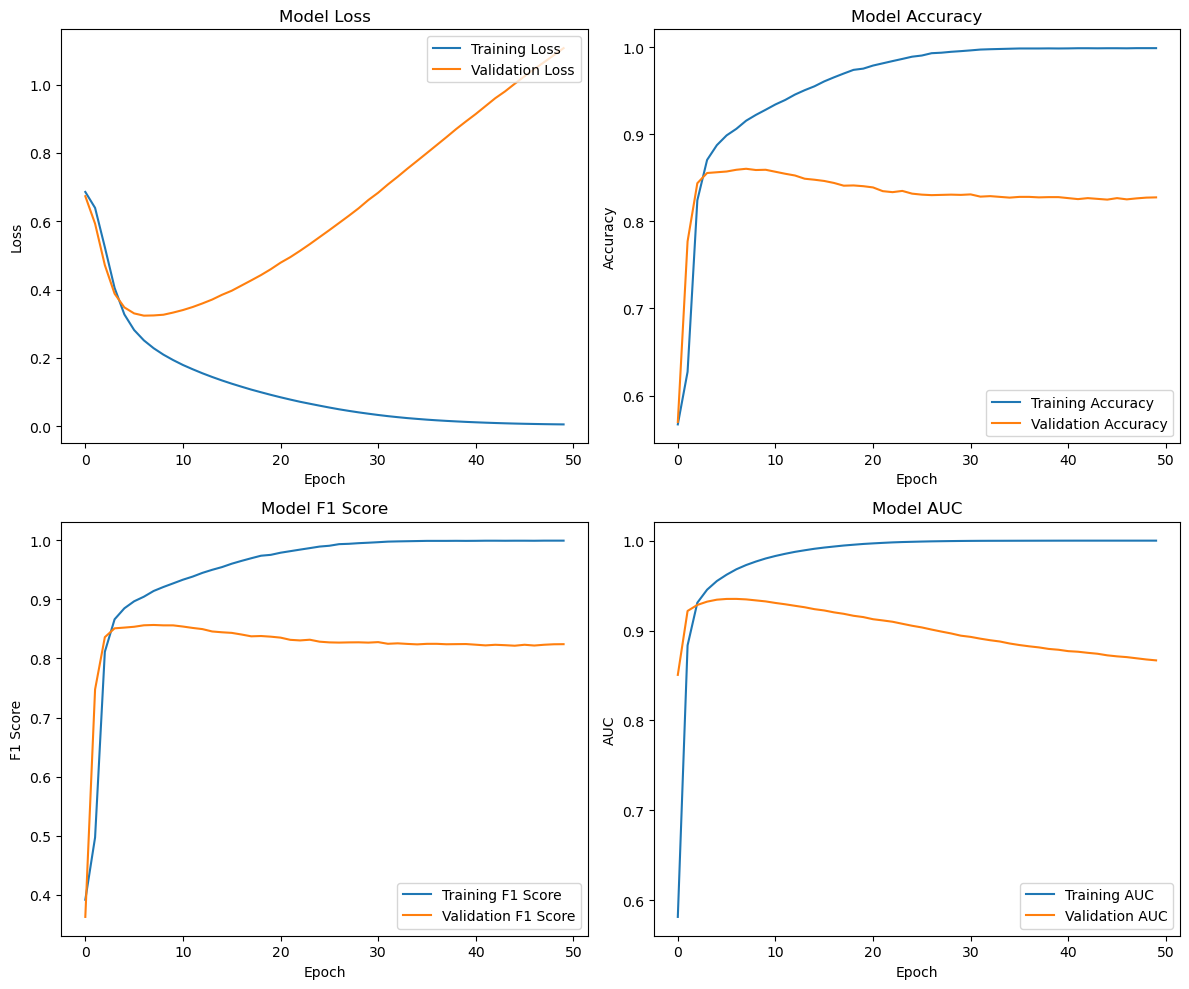

In [12]:
plot_training_history(overfit_history)

The overfitting model has obtained an accuracy of 0.83, an F1 score of 0.82 and an AUC-ROC of 0.87 on the validation set. From the training history plot above, it shows that the validation loss of the model starts to increase drastically after about 4 epochs. Also, for the other plots (accuracy, F1 score and AUC), each of the validation metrics generally displays a plateau while the training metrics continue to improve. All of these indicate overfitting and regularisation techniques should be considered to improve genralization.

## Regularization and tuning

### Regularization techniques

The deeper model above overfits the data. To mitigate overfitting and improve model generalization, regularization techniques such as **Droupout** and **L2 regularization** are used. Dropout randomly deactivates a fraction of neurons during training, preventing the model from becoming too reliant on specific neurons and promoting the learning of more robust features. L2 Regularization, also known as Ridge regularization, adds a penalty to the loss function based on the squared values of the model's weights, discouraging large weights that could cause overfitting.

### Hyperparameter Tuning using K-Fold cross-validation
K-Fold cross-validation is performed to evaluate different combinations of hyperparameters defined in "**param_grid**". For each combination, the model is cloned, and the dropout rate and L2 regularization are adjusted accordingly. The model is then trained and evaluated across different data splits, with results averaged to determine the best hyperparameter settings.

In [13]:
from sklearn.model_selection import KFold
import itertools
from tensorflow.keras.models import clone_model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

def cross_validation(X, y, cv, model, param_grid, loss, metrics, epochs, callbacks, seed=0):
    
    kf = KFold(n_splits=cv, shuffle=True, random_state=seed)
    keys, values = zip(*param_grid.items())
    cvs = {}

    for idx, params in enumerate([dict(zip(keys, v)) for v in itertools.product(*values)]):
#         print(f"Running combination {idx + 1} / {len(list(itertools.product(*values)))}: {params}")
        scores = []
        for train_index, val_index in kf.split(X):
            nn = clone_model(model)
            nn.set_weights(model.get_weights())
            for layer in nn.layers:
                if isinstance(layer, Dropout):
                    layer.rate = params['dropout']
                if isinstance(layer, Dense):
                    if layer.activation.__name__ != 'sigmoid':  # Avoid modifying the output layer
                        layer.kernel_regularizer = l2(params['alpha'])
            
            nn.compile(optimizer=Adam(learning_rate=params['learning_rate']), loss=loss, metrics=metrics)
            
            # Train the model
            nn.fit(X[train_index], y[train_index],
                   batch_size=params['batch_size'], epochs=epochs,
                   validation_data=(X[val_index], y[val_index]),
                   callbacks=callbacks, verbose=0)
            scores.append(nn.evaluate(X[val_index], y[val_index], verbose=0)[1:])
            del nn

        cvs[str(params)] = np.array(scores).mean(axis=0)

    return cvs

In [14]:
# Define a parameter grid for tuning
param_grid = {
    'learning_rate': [0.0001],
    'dropout': [0.3, 0.5, 0.7],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2],
    'batch_size': [256]
}

# Define the model with hyperparameters
model = Sequential([
    Dense(64, kernel_regularizer=l2(0.01), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, kernel_regularizer=l2(0.01), activation='relu'), 
    Dropout(0.5),
    Dense(output_classes, activation='sigmoid') # Output layer for binary classification
])

In [15]:
# Define loss, metrics and callbacks for early stopping
loss='binary_crossentropy'
metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)]
callbacks = [EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=75, verbose=0)]

# Use the cross-validation function to find the best hyperparameters
cv_results = cross_validation(X_train_tfidf, y_train, cv=5, model=model, param_grid=param_grid, 
                              loss=loss, metrics=metrics, epochs=75, callbacks=callbacks, seed=42)

# Find the best hyperparameters
best_params = max(cv_results, key=lambda k:cv_results[k][2])
regularized_best_score = cv_results[best_params]

# Load best_params string into Python Dictionary
regularized_best_params = eval(best_params)

print(f"Best Hyperparameters: {regularized_best_params}")
print(f"Best Score: {regularized_best_score}")

Best Hyperparameters: {'learning_rate': 0.0001, 'dropout': 0.3, 'alpha': 1e-05, 'batch_size': 256}
Best Score: [0.6678599  0.53984244 0.67300932]


According to the cross-validation results, the best parameters were found to be a dropout of 0.3 and an L2 regularization factor of 0.00001. 

By using these parameters, the regularized model is retrained and evaluated as such:

In [16]:
# Build the regularized model with optimal hyperparameters
regularized_model = Sequential([
    Dense(64, kernel_regularizer=l2(regularized_best_params['alpha']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(regularized_best_params['dropout']),
    Dense(64, kernel_regularizer=l2(regularized_best_params['alpha']), activation='relu'), 
    Dropout(regularized_best_params['dropout']),
    Dense(output_classes, activation='sigmoid')
])

# Compile the regularized model
regularized_model.compile(optimizer=Adam(learning_rate=regularized_best_params['learning_rate']), 
                          loss='binary_crossentropy', 
                          metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])

# Train the regularized model
regularized_history = regularized_model.fit(X_train_tfidf, y_train, 
                                        epochs=epochs * 2, 
                                        batch_size=regularized_best_params['batch_size'], 
                                        validation_data=(X_val_tfidf, y_val), 
                                        callbacks=callbacks, verbose=0)

# Evaluate the regularized model
regularized_scores = regularized_model.evaluate(X_test_tfidf, y_test, verbose=0)

# Display the evaluation metrics
print(f"Regularized Model - Performance Metrics")
print(f"Accuracy: {regularized_scores[1]: .2f}")
print(f"F1 Score: {regularized_scores[2]: .2f}")
print(f"AUC-ROC: {regularized_scores[3]: .2f}")

Regularized Model - Performance Metrics
Accuracy:  0.86
F1 Score:  0.86
AUC-ROC:  0.93


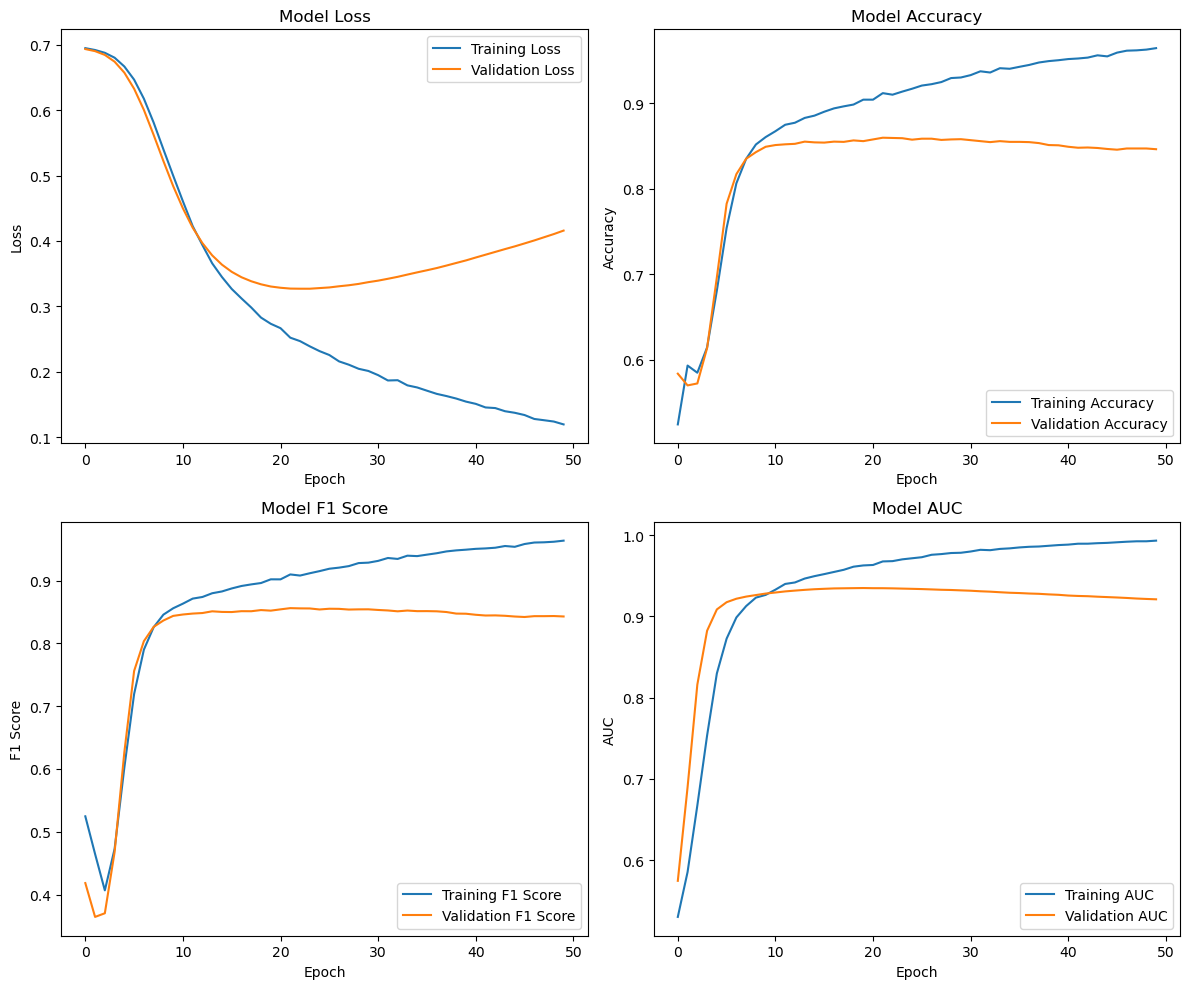

In [17]:
plot_training_history(regularized_history)

The regularized model has obtained an accuracy of 0.86, an F1 score of 0.86 and an AUC-ROC of 0.93. The training history plot shows that the validation loss is now stabilized and does not increase significantly, indicating that the regularization techniques have mtigated overfitting effectively.

## Why L2 regularization is the preferred regularization technique?

In order to further prove that L2 regularization is the preferred regularization technique, other regularization techniques such as **L1 regularization** and **Elastic Net regularization** are tested and analyzed with the regularized model. This experimentation with various regularization techniques can help to understand the consistency of each technique in the model's performance and its complexity and efficiency during the process of cross-validation and hyperparameter tuning. 

There are some key factors to consider when choosing the right regularization technique. According to this report, the context of the problem revolves around sentiment analysis as it invloves classifying Steam game reviews into positive and negative ones from the given dataset. Additionally, since the dataset is textual-based, its large number of features are highly correlated as shown by the TF-IDF representation during data preprocessing. 

L2 regularization is highly effective when dealing wih multicollinearity. It applies a quadratic penalty to the coefficients and distributes the weights among the correlated features instead of discarding them. 

$$ Loss = Original Loss + ( \lambda \sum_{i=1}^{n} w_i^2 ) $$


The quadratic nature of the L2 penalty results in a convex, smooth loss function, which is easier to optimize and leads to more stable convergence during training. L2 regularization also enables feature retention, which can be  be beneficial if all features in the dataset contribute to the model's performance.

### L1 regularization (Lasso regularization)
 
One distinct characteristic that L1 regularization has is feature selection. Its main function is to add a penalty equal to the sum of the absolute values of the coefficients to the loss function, leading to drive some coefficients to exactly zero and excluding irrelevant or redundant features. 

$$ Loss = Original Loss + ( \lambda \sum_{i=1}^{n} |w_i| ) $$

The penalty allows easier interpretation of models where only a few features of the dataset are truly important. L1 regularization is particularly useful in scenarios with more features than observations (e.g., text data with a large vocabulary), where feature selection is crucial.

In [18]:
from tensorflow.keras.regularizers import l1

# Define the L1 model with hyperparameters
l1_model = Sequential([
    Dense(64, kernel_regularizer=l1(0.01), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, kernel_regularizer=l1(0.01), activation='relu'), 
    Dropout(0.5),
    Dense(output_classes, activation='sigmoid') # Output layer for binary classification
])

# Use the cross-validation function to find the best hyperparameters
l1_cv_results = cross_validation(X_train_tfidf, y_train, cv=5, model=l1_model, param_grid=param_grid, 
                              loss=loss, metrics=metrics, epochs=75, callbacks=callbacks, seed=42)

# Find the best hyperparameters
l1_best_params = max(l1_cv_results, key=lambda k:l1_cv_results[k][2])
regularized_l1_best_score = l1_cv_results[l1_best_params]

# Load best_params string into Python Dictionary
regularized_l1_best_params = eval(l1_best_params)

print(f"L1 regularization - Best Hyperparameters: {regularized_l1_best_params}")
print(f"L1 regularization - Best Score: {regularized_l1_best_score}")

L1 regularization - Best Hyperparameters: {'learning_rate': 0.0001, 'dropout': 0.3, 'alpha': 0.01, 'batch_size': 256}
L1 regularization - Best Score: [0.55668868 0.40013838 0.50400335]


In [19]:
# Build the regularized L1 model with and optimal hyperparameters
regularized_l1_model = Sequential([
    Dense(64, kernel_regularizer=l1(regularized_l1_best_params['alpha']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(regularized_l1_best_params['dropout']),
    Dense(64, kernel_regularizer=l1(regularized_l1_best_params['alpha']), activation='relu'),
    Dropout(regularized_l1_best_params['dropout']),
    Dense(output_classes, activation='sigmoid')
])

# Compile the regularized L1 model
regularized_l1_model.compile(optimizer=Adam(learning_rate=regularized_l1_best_params['learning_rate']), 
                             loss='binary_crossentropy', 
                             metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])

# Train the regularized model with L1 regularisation
regularized_l1_history = regularized_l1_model.fit(X_train_tfidf, y_train, 
                                                  epochs=epochs * 2, 
                                                  batch_size=regularized_l1_best_params['batch_size'], 
                                                  validation_data=(X_val_tfidf, y_val), 
                                                  callbacks=callbacks, verbose=0)

# Evaluate the regularized L1 model
regularized_l1_scores = regularized_l1_model.evaluate(X_test_tfidf, y_test, verbose=0)

# Display the evaluation metrics
print(f"Regularized Model with L1 Regularisation - Performance Metrics")
print(f"Accuracy: {regularized_l1_scores[1]: .2f}")
print(f"F1 Score: {regularized_l1_scores[2]: .2f}")
print(f"AUC-ROC: {regularized_l1_scores[3]: .2f}")

Regularized Model with L1 Regularisation - Performance Metrics
Accuracy:  0.56
F1 Score:  0.42
AUC-ROC:  0.51


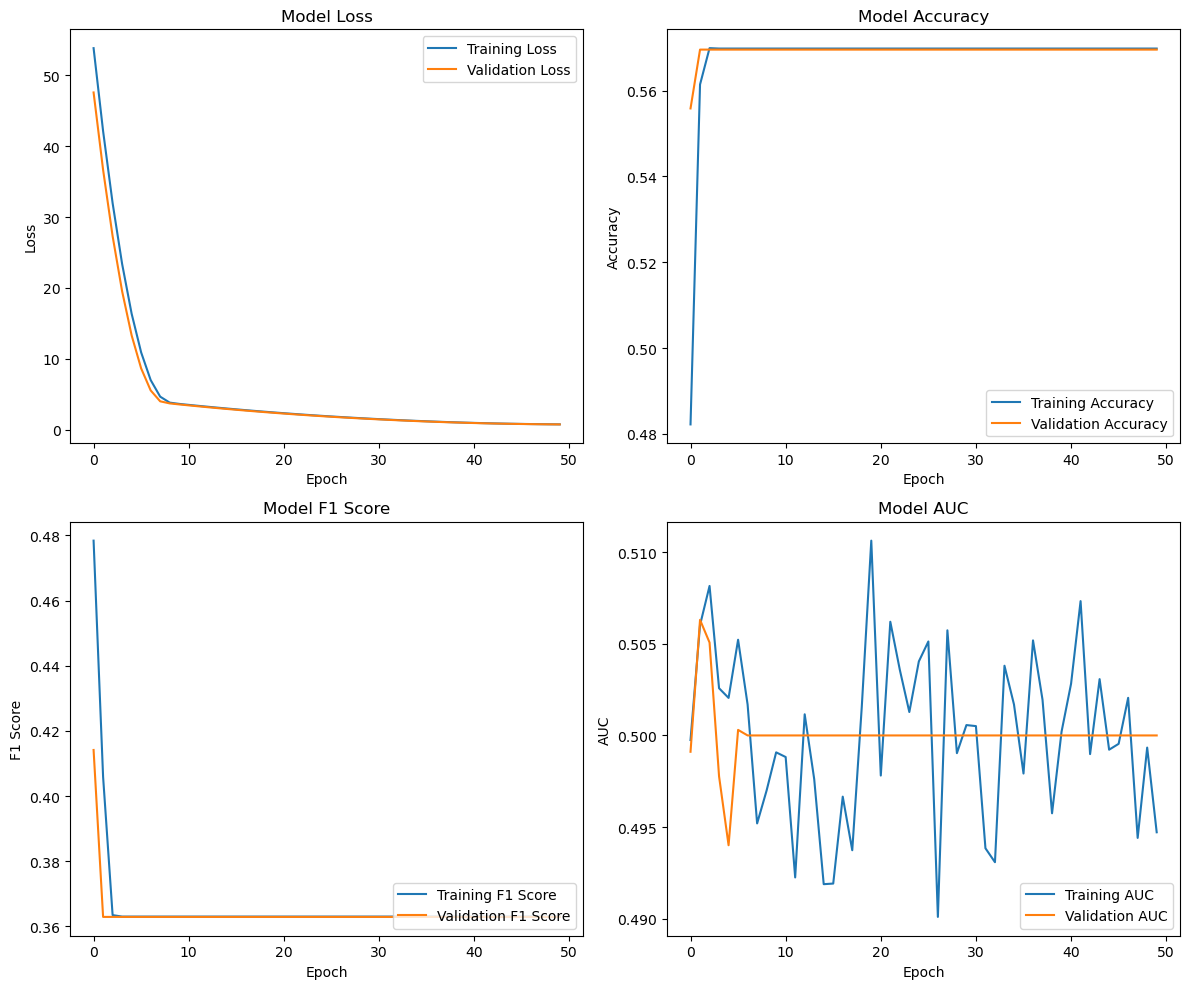

In [20]:
plot_training_history(regularized_l1_history)

However, L1 regularization has a tendency to face over-sparsity, where too many features of the dataset are excluded. The loss of features can result in underfitting of the model as shown by the model loss plot, in which the training loss stops only after about 8 epochs. 

The suboptimal model performance indicated from the evaluation metrics above and the instability of the AUC can be due to L1 regularization's arbitrary selection of one feature over others. Since the dataset's features are highly correlated and the goal is to reduce overfitting while retaining all features, L1 regularization might not be the best technique used for this study.

### Elastic Net Regularization

By combining both L1 and L2 regularization, Elastic Net adds a weighted sum of the L1 and L2 penalties to the loss function, allowing for both feature selection (L1) and weight shrinkage (L2).

$$ Loss = Original Loss + ( \lambda_1 \sum_{i=1}^{n} |w_i| + \lambda_2 \sum_{i=1}^{n} w_i^2) $$

Elastic Net may be a flexible choice for complex, high-dimensional datasets as it can adjust the balance of the model between L1 and L2 penalities, thus providing a balanced approach that might yield better performance than using L1 or L2 alone. 

This also comes with additional complexity due to the required tuning of two regularization parameters ($ \lambda_1 $ and $ \lambda_2 $), making the model harder to optimize and more computationally expensive. This can be seen by having to define another parameter grid for the cross-validation and hyperparameter tuning process below, adding two new hyperparameters ($ l_1 $ and $ l_2 $) instead of 'alpha'.

In [21]:
from tensorflow.keras.regularizers import l1_l2

# Modify the cross-validation function to include Elastic Net regularization
def cross_validation_elastic_net(X, y, cv, model, param_grid, loss, metrics, epochs, callbacks, seed=0):
    kf = KFold(n_splits=cv, shuffle=True, random_state=seed)
    keys, values = zip(*param_grid.items())
    cvs = {}

    for idx, params in enumerate([dict(zip(keys, v)) for v in itertools.product(*values)]):
#         print(f"Running combination {idx + 1} / {len(list(itertools.product(*values)))}: {params}")
        scores = []
        for train_index, val_index in kf.split(X):
            nn = clone_model(model)
            nn.set_weights(model.get_weights())
            for layer in nn.layers:
                if isinstance(layer, Dense):
                    if layer.activation.__name__ != 'sigmoid':  # Avoid modifying the output layer
                        layer.kernel_regularizer = l1_l2(l1=params['l1'], l2=params['l2'])
                if isinstance(layer, Dropout):
                    layer.rate = params['dropout']

            nn.compile(optimizer=Adam(learning_rate=params['learning_rate']),
                       loss=loss, metrics=metrics)
            nn.fit(X[train_index], y[train_index],
                   batch_size=params['batch_size'], epochs=epochs,
                   validation_data=(X[val_index], y[val_index]),
                   callbacks=callbacks, verbose=0)
            scores.append(nn.evaluate(X[val_index], y[val_index], verbose=0)[1:])
            del nn

        cvs[str(params)] = np.array(scores).mean(axis=0)

    return cvs

# Define a parameter grid for Elastic Net regularization
param_grid_elastic_net = {
    'learning_rate': [0.0001],
    'dropout': [0.3, 0.5, 0.7],
    'l1': [1e-5, 1e-4, 1e-3],
    'l2': [1e-4, 1e-3, 1e-2],
    'batch_size': [256]
}


# Define the model using Elastic Net Regularization
model_elastic_net = Sequential([
    Dense(64, kernel_regularizer=l1_l2(l1=1e-4, l2=1e-3), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, kernel_regularizer=l1_l2(l1=1e-4, l2=1e-3), activation='relu'),
    Dropout(0.5),
    Dense(output_classes, activation='sigmoid')
])

# Use the cross-validation function to find the best hyperparameters for Elastic Net regularization
cv_results_elastic_net = cross_validation_elastic_net(X_train_tfidf, y_train, cv=5, model=model_elastic_net, 
                                                      param_grid=param_grid_elastic_net, 
                                                      loss=loss, metrics=metrics, 
                                                      epochs=75, callbacks=callbacks, seed=42)

# Find the best hyperparameters
best_params_elastic_net = max(cv_results_elastic_net, key=lambda k:cv_results_elastic_net[k][2])
regularized_best_score_elastic_net = cv_results_elastic_net[best_params_elastic_net]

# Load best_params string into Python Dictionary
regularized_best_params_elastic_net = eval(best_params_elastic_net)

print(f"Elastic Net Regularization - Best Hyperparameters: {regularized_best_params_elastic_net}")
print(f"Elastic Net Regularization - Best Score: {regularized_best_score_elastic_net}")

Elastic Net Regularization - Best Hyperparameters: {'learning_rate': 0.0001, 'dropout': 0.7, 'l1': 0.0001, 'l2': 0.0001, 'batch_size': 256}
Elastic Net Regularization - Best Score: [0.5699314  0.3728388  0.51798981]


In [22]:
# Build the regularized Elastic Net model with optimal hyperparameters
regularized_elastic_net_model = Sequential([
    Dense(64, kernel_regularizer=l1_l2(l1=regularized_best_params_elastic_net['l1'], l2=regularized_best_params_elastic_net['l2']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(regularized_best_params_elastic_net['dropout']),
    Dense(64, kernel_regularizer=l1_l2(l1=regularized_best_params_elastic_net['l1'], l2=regularized_best_params_elastic_net['l2']), activation='relu'),
    Dropout(regularized_best_params_elastic_net['dropout']),
    Dense(output_classes, activation='sigmoid')
])

# Compile the regularized Elastic Net model 
regularized_elastic_net_model.compile(optimizer=Adam(learning_rate=regularized_best_params_elastic_net['learning_rate']), 
                             loss='binary_crossentropy', 
                             metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])

# Train the regularized Elastic Net model
regularized_elastic_net_model_history = regularized_elastic_net_model.fit(X_train_tfidf, y_train, 
                                                  epochs=epochs * 2, 
                                                  batch_size=regularized_best_params_elastic_net['batch_size'], 
                                                  validation_data=(X_val_tfidf, y_val), 
                                                  callbacks=callbacks, verbose=0)

# Evaluate the regularized Elastic Net model
regularized_elastic_net_model_scores = regularized_elastic_net_model.evaluate(X_test_tfidf, y_test, verbose=0)

# Display the evaluation metrics
print(f"Regularized Model with Elastic Net Regularisation - Performance Metrics")
print(f"Accuracy: {regularized_elastic_net_model_scores[1]: .2f}")
print(f"F1 Score: {regularized_elastic_net_model_scores[2]: .2f}")
print(f"AUC-ROC: {regularized_elastic_net_model_scores[3]: .2f}")

Regularized Model with Elastic Net Regularisation - Performance Metrics
Accuracy:  0.57
F1 Score:  0.37
AUC-ROC:  0.52


Elastic Net's additional tuning of parameters makes the model more sensitive to hyperparameter settings. Its suboptimal performance shown in the evaluation metrics and its training history can be due to the optimal combination of the hyperparameters not found properly after the whole process. 

The application of both L1 and L2 penalities of Elastic Net might overly constrain the model weights, leading to a reduction in the model's ability to capture complex patterns in the dataset. There is also a risk of over-penalization if the balance between L1 and L2 is not carefully tuned, causing underfitting of the model and poor generalization on the test set.

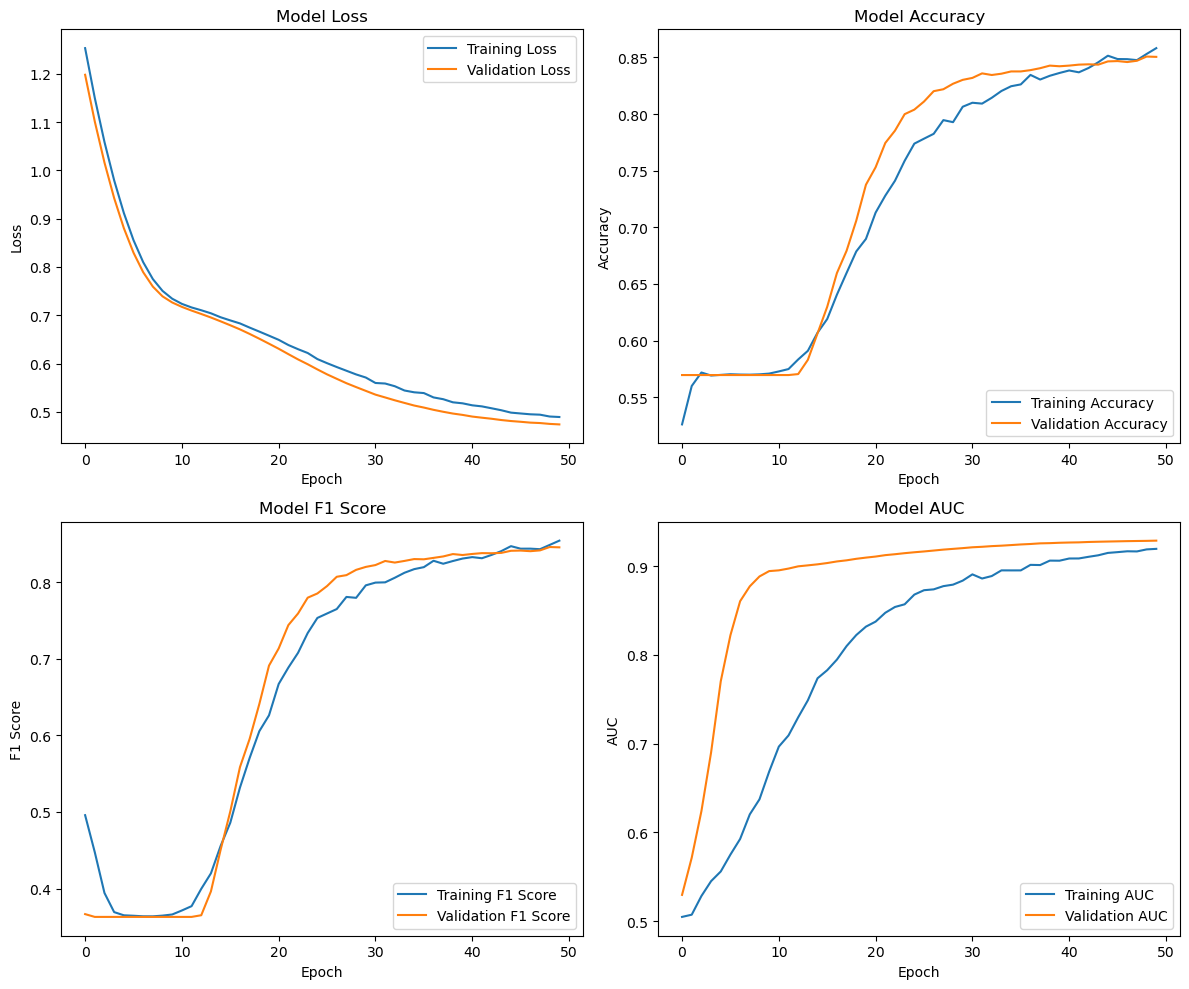

In [23]:
plot_training_history(regularized_elastic_net_model_history)

### Comparison of different regularization techniques

In [24]:
# Compare the results from different regularization techniques (L2 vs. L1 vs. Elastic Net)
reg_models_perf = {
    "Model": ["L2 Regularization", "L1 Regularization", "Elastic Net Regularization"], 
    "Accuracy": [regularized_scores[1], regularized_l1_scores[1], regularized_elastic_net_model_scores[1]], 
    "F1-Score": [regularized_scores[2], regularized_l1_scores[2], regularized_elastic_net_model_scores[2]],
    "AUC-ROC": [regularized_scores[3], regularized_l1_scores[3], regularized_elastic_net_model_scores[3]]
}

# Creating a DataFrame for the analysis table
reg_models_perf_df = pd.DataFrame(reg_models_perf)
reg_models_perf_df

,Model,Accuracy,F1-Score,AUC-ROC
0,L2 Regularization,0.862818,0.860062,0.934747
1,L1 Regularization,0.559588,0.416655,0.508708
2,Elastic Net Regularization,0.570735,0.366413,0.521681


Based on the comparison above, L2 regularization is the most stable and accurate among the three. In the context of sentiment analysis on text data, a regularization method that is less agressive in feature selection and more focused towards smoothing weight decay is more beneficial [4]. 

L2 regularization does provide smooth weight decay by penalizing large coefficients, which helps in maintaining all features in the model rather than driving some to zero, as is common with L1 regularization [5]. This characteristic of L2 regularization can be particularly advantageous when dealing with dense features such as TF-IDF vectors, where every feature carries potentially meaningful information [6]. 

This leads to more stable and robust models, especially in contexts where all features contribute to the prediction and there is no need to zero out irrelevant features. Elastic Net, while a useful combination, can add unnecessary complexity if not carefully tuned, making L2 a more straightforward and effective choice in many cases.

## Further exploration and analysis of various neural network architectures

Various neural network architectures are experimented and analysed in comparison with the regularized, deeper model for their performance. These architectures include:

- **Different optimizers**:
    - Models with '**RMSprop**' and '**Nadam**' optimizers are tested and evaluated 
    - These optimizers converge differently and significantly impact the training dynamics, affecting the final performance of the models
<br><br>
- **Different activation functions**: 
    - Using a different activation function might help the model to learn better, especially in complex tasks
    - This includes swapping of the '**ReLU**' activation function to other activation functions such as '**sigmoid**' and '**swish**'
<br><br>
- **Different neurons per layer**:
    - Exploring models of varying amounts of neurons per layer; can potentially train the model into learning patterns from the dataset

### Different optimizers

One of the most popular optimization algorithms used for training deep neural networks is the **Adam (Adaptive Moment Estimation) optimizer**. The primary reason why it is the default choice for compiling the baseline and regularized models is that it is highly efficient for both small and large-scale models. 

Adam combines the best properties of the AdaGrad (Adaptive Gradient Algorithm) and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems [7]. Its learning rate adaptation and ability to converge faster make it a go-to optimizer for a variety of deep learning tasks such as computer visdion, natural language processing (NLP) and reinforcement learning. 

#### Root Mean Square Propagation (RMSprop)

An adaptive learning rate method that that is an improved version of AdaGrad. It maintains a per-parameter learning rate adjusting it based on the average of the squared gradients, using an exponentially decaying average.

$$
E[g_t^2] = \beta E[g_{t-1}^2] + (1 - \beta) g_t^2
$$

where:
- $g_t$ is the gradient at time step $t$
- $E[g_t^2]$ is the exponentially weighted moving average of the squared gradient
- $\beta$ is the decay rate


Similar to Adam, RMSprop is robust in cases where the data or gradients are sparse, which can be helpful in NLP tasks or recommendation systems. It was proposed by Geoffrey Hinton in a lecture on optimization [8], designed to handle non-stationary objectives and has been particularly effective in recurrent neural networks (RNNs). 

Unfortunately, the standard algorithm does not have momentum in which the Adam optimizer does, thus it may not accelerate learning in the same way that optimizers with momentum can. RMSprop might not be as forgiving as Adam during hyperparameter tuning and is more sensitive to hyperparameter choices, especially the learning rate.

In [25]:
from tensorflow.keras.optimizers import RMSprop
# Modify the cross-validation function to include RMSprop optimizer
def cross_validation_with_rmsprop(X, y, cv, model, param_grid, loss, metrics, epochs, callbacks, seed=0):
    kf = KFold(n_splits=cv, shuffle=True, random_state=seed)
    keys, values = zip(*param_grid.items())
    cvs = {}

    for idx, params in enumerate([dict(zip(keys, v)) for v in itertools.product(*values)]):
#         print(f"Running combination {idx + 1} / {len(list(itertools.product(*values)))}: {params}")
        scores = []
        for train_index, val_index in kf.split(X):
            nn = clone_model(model)
            nn.set_weights(model.get_weights())
            for layer in nn.layers:
                if isinstance(layer, Dropout):
                    layer.rate = params['dropout']
                if isinstance(layer, Dense):
                    if layer.activation.__name__ != 'sigmoid':  # Avoid modifying the output layer
                        layer.kernel_regularizer = l2(params['alpha'])
            
            # Using RMSprop optimizer
            optimizer = RMSprop(learning_rate=params['learning_rate'])
            nn.compile(optimizer=optimizer, loss=loss, metrics=metrics)
            
            nn.fit(X[train_index], y[train_index],
                   batch_size=params['batch_size'], epochs=epochs,
                   validation_data=(X[val_index], y[val_index]),
                   callbacks=callbacks, verbose=0)
            scores.append(nn.evaluate(X[val_index], y[val_index], verbose=0)[1:])
            del nn

        cvs[str(params)] = np.array(scores).mean(axis=0)

    return cvs

# Use the cross-validation function to find the best hyperparameters for RMSprop
rmsprop_cv_results = cross_validation_with_rmsprop(X_train_tfidf, y_train, cv=5, 
                                                   model=model, param_grid=param_grid, 
                                                   loss=loss, metrics=metrics, epochs=75, 
                                                   callbacks=callbacks, seed=42)

# Find the best hyperparameters
rmsprop_best_params = max(rmsprop_cv_results, key=lambda k:rmsprop_cv_results[k][2])
regularized_rmsprop_best_score = rmsprop_cv_results[rmsprop_best_params]

# Load best_params string into Python Dictionary
regularized_rmsprop_best_params = eval(rmsprop_best_params)

print(f"RMSprop Optimizer - Best Hyperparameters: {regularized_rmsprop_best_params}")
print(f"RMSprop Optimizer - Best Score: {regularized_rmsprop_best_score}")

RMSprop Optimizer - Best Hyperparameters: {'learning_rate': 0.0001, 'dropout': 0.3, 'alpha': 0.0001, 'batch_size': 256}
RMSprop Optimizer - Best Score: [0.56983634 0.3629778  0.50878673]


In [26]:
# Build the regularized model with optimal hyperparameters (from above)
# renaming it as regularized_rmsprop_model
regularized_rmsprop_model = Sequential([
    Dense(64, kernel_regularizer=l2(regularized_best_params['alpha']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(regularized_best_params['dropout']),
    Dense(64, kernel_regularizer=l2(regularized_best_params['alpha']), activation='relu'), 
    Dropout(regularized_best_params['dropout']),
    Dense(output_classes, activation='sigmoid')
])

# Compile the model using RMSprop optimizer 
regularized_rmsprop_model.compile(optimizer=RMSprop(learning_rate=regularized_best_params['learning_rate']), 
                                  loss='binary_crossentropy', 
                                  metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])
# Train the model
regularized_rmsprop_history = regularized_rmsprop_model.fit(X_train_tfidf, y_train, 
                                        epochs=epochs * 2, 
                                        batch_size=regularized_best_params['batch_size'], 
                                        validation_data=(X_val_tfidf, y_val), 
                                        callbacks=callbacks, verbose=0)

# Evaluate the regularized model
regularized_rmsprop_scores = regularized_rmsprop_model.evaluate(X_test_tfidf, y_test, verbose=0)

# Display the evaluation metrics
print(f"Regularized Model (with RMSprop optimizer) - Performance Metrics")
print(f"Accuracy: {regularized_rmsprop_scores[1]: .2f}")
print(f"F1 Score: {regularized_rmsprop_scores[2]: .2f}")
print(f"AUC-ROC: {regularized_rmsprop_scores[3]: .2f}")

C:\Users\Marcus Tan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Regularized Model (with RMSprop optimizer) - Performance Metrics
Accuracy:  0.57
F1 Score:  0.36
AUC-ROC:  0.51


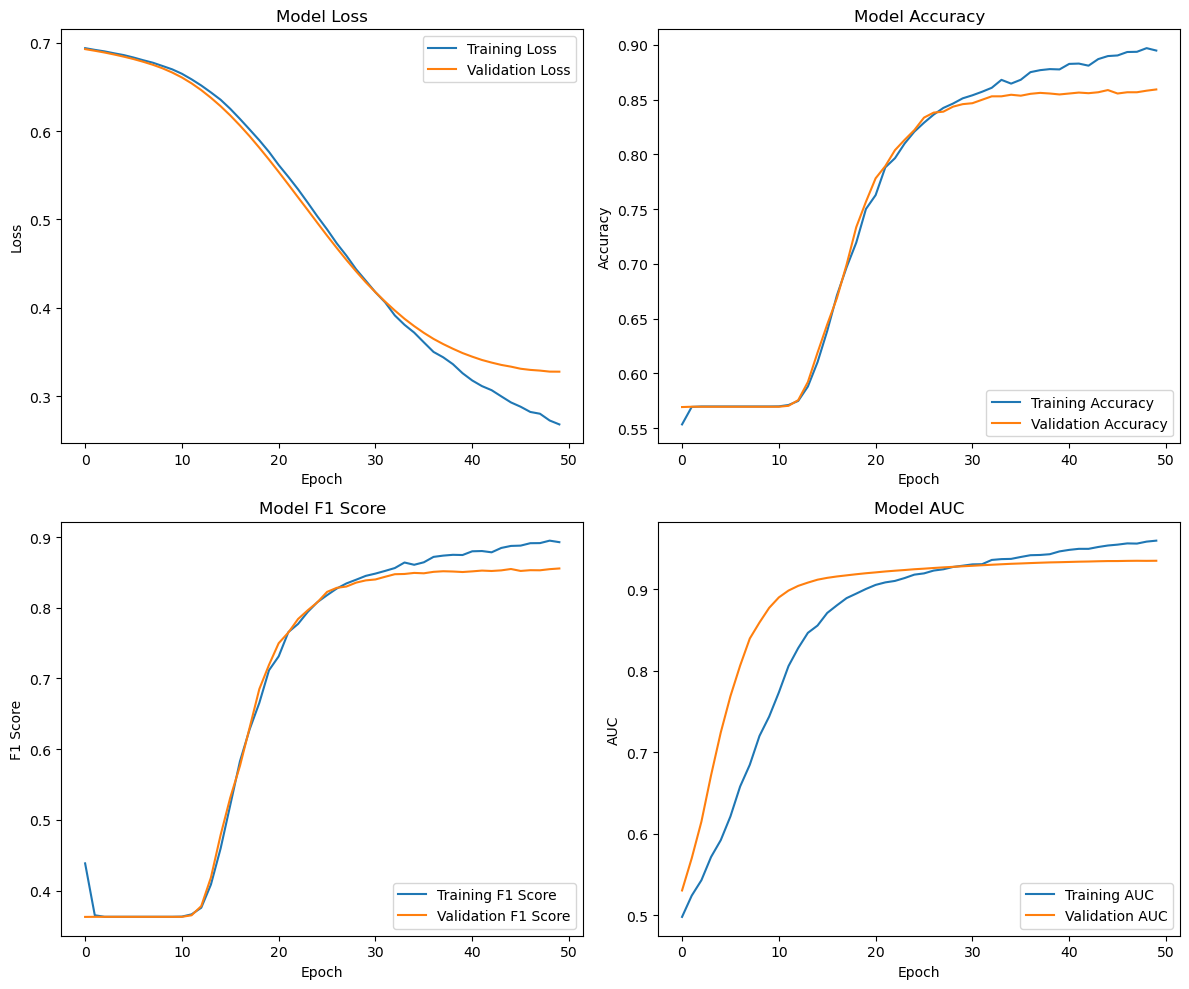

In [27]:
plot_training_history(regularized_rmsprop_history)

Even after undergoing cross-validation and hyperparameter tuning, the RMSprop still does not perform as well as Adam due to the fixed learning rate (0.0001) from '**param_grid**'. RMsprop struggles to generalize the model as shown from the model loss plot, where the validation loss increases slightly after a greater number of epochs. This means that RMSprop may require more task-specific tuning and is not as versatile as the Adam optimizer.

#### Nadam (Nesterov-accelerated Adaptive Moment Estimation)

A variant of Adam that incorporates Nesterov momentum into the Adam optimization process. Nesterov momentum improves traditional momentum-based methods by computing the gradient at a slightly updated position, which can provide a more accurate approximation of where the gradients are heading [9]. Nadam builds on the strengths of both Adam and Nestrov momentum, theoretically aiming to provide faster convergence and improved performance in deep learning tasks [10]. 

This benefit, however, is not always seen in real-world tasks and the improvement is often marginal or inconsistent, especially in deep networks. The added Nesterov momentum step also causes slight computational overhead to the Nadam optimizer and might not lead to better performance of the model.

In [28]:
from tensorflow.keras.optimizers import Nadam

# Modify the cross-validation function to include Nadam optimizer
def cross_validation_with_nadam(X, y, cv, model, param_grid, loss, metrics, epochs, callbacks, seed=0):
    kf = KFold(n_splits=cv, shuffle=True, random_state=seed)
    keys, values = zip(*param_grid.items())
    cvs = {}

    for idx, params in enumerate([dict(zip(keys, v)) for v in itertools.product(*values)]):
#         print(f"Running combination {idx + 1} / {len(list(itertools.product(*values)))}: {params}")
        scores = []
        for train_index, val_index in kf.split(X):
            nn = clone_model(model)
            nn.set_weights(model.get_weights())
            for layer in nn.layers:
                if isinstance(layer, Dropout):
                    layer.rate = params['dropout']
                if isinstance(layer, Dense):
                    if layer.activation.__name__ != 'sigmoid':  # Avoid modifying the output layer
                        layer.kernel_regularizer = l2(params['alpha'])
            
            # Using Nadam optimizer
            optimizer = Nadam(learning_rate=params['learning_rate'])
            nn.compile(optimizer=optimizer, loss=loss, metrics=metrics)
            
            nn.fit(X[train_index], y[train_index],
                   batch_size=params['batch_size'], epochs=epochs,
                   validation_data=(X[val_index], y[val_index]),
                   callbacks=callbacks, verbose=0)
            scores.append(nn.evaluate(X[val_index], y[val_index], verbose=0)[1:])
            del nn

        cvs[str(params)] = np.array(scores).mean(axis=0)

    return cvs

# Use the cross-validation function to find the best hyperparameters for Nadam
nadam_cv_results = cross_validation_with_nadam(X_train_tfidf, y_train, 
                                               cv=5, model=model, 
                                               param_grid=param_grid, 
                                               loss=loss, metrics=metrics, 
                                               epochs=75, callbacks=callbacks, 
                                               seed=42)

# Find the best hyperparameters
nadam_best_params = max(nadam_cv_results, key=lambda k:nadam_cv_results[k][2])
regularized_nadam_best_score = nadam_cv_results[nadam_best_params]

# Load best_params string into Python Dictionary
regularized_nadam_best_params = eval(nadam_best_params)

print(f"Nadam Optimizer - Best Hyperparameters: {regularized_nadam_best_params}")
print(f"Nadam Optimizer - Best Score: {regularized_nadam_best_score}")

Nadam Optimizer - Best Hyperparameters: {'learning_rate': 0.0001, 'dropout': 0.7, 'alpha': 0.01, 'batch_size': 256}
Nadam Optimizer - Best Score: [0.56916935 0.36453663 0.51225499]


In [29]:
# Build the regularized model with optimal hyperparameters (from above)
# renaming it as regularized_nadam_model
regularized_nadam_model = Sequential([
    Dense(64, kernel_regularizer=l2(regularized_nadam_best_params['alpha']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(regularized_nadam_best_params['dropout']),
    Dense(64, kernel_regularizer=l2(regularized_nadam_best_params['alpha']), activation='relu'), 
    Dropout(regularized_nadam_best_params['dropout']),
    Dense(output_classes, activation='sigmoid')
])

# Compile the model using RMSprop optimizer 
regularized_nadam_model.compile(optimizer=Nadam(learning_rate=regularized_nadam_best_params['learning_rate']), 
                                  loss='binary_crossentropy', 
                                  metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])
# Train the model
regularized_nadam_history = regularized_nadam_model.fit(X_train_tfidf, y_train, 
                                                        epochs=epochs * 2, 
                                                        batch_size=regularized_nadam_best_params['batch_size'], 
                                                        validation_data=(X_val_tfidf, y_val), 
                                                        callbacks=callbacks, verbose=0)

# Evaluate the regularized model
regularized_nadam_scores = regularized_nadam_model.evaluate(X_test_tfidf, y_test, verbose=0)

# Display the evaluation metrics
print(f"Regularized Model (with Nadam optimizer) - Performance Metrics")
print(f"Accuracy: {regularized_nadam_scores[1]: .2f}")
print(f"F1 Score: {regularized_nadam_scores[2]: .2f}")
print(f"AUC-ROC: {regularized_nadam_scores[3]: .2f}")

Regularized Model (with Nadam optimizer) - Performance Metrics
Accuracy:  0.57
F1 Score:  0.36
AUC-ROC:  0.51


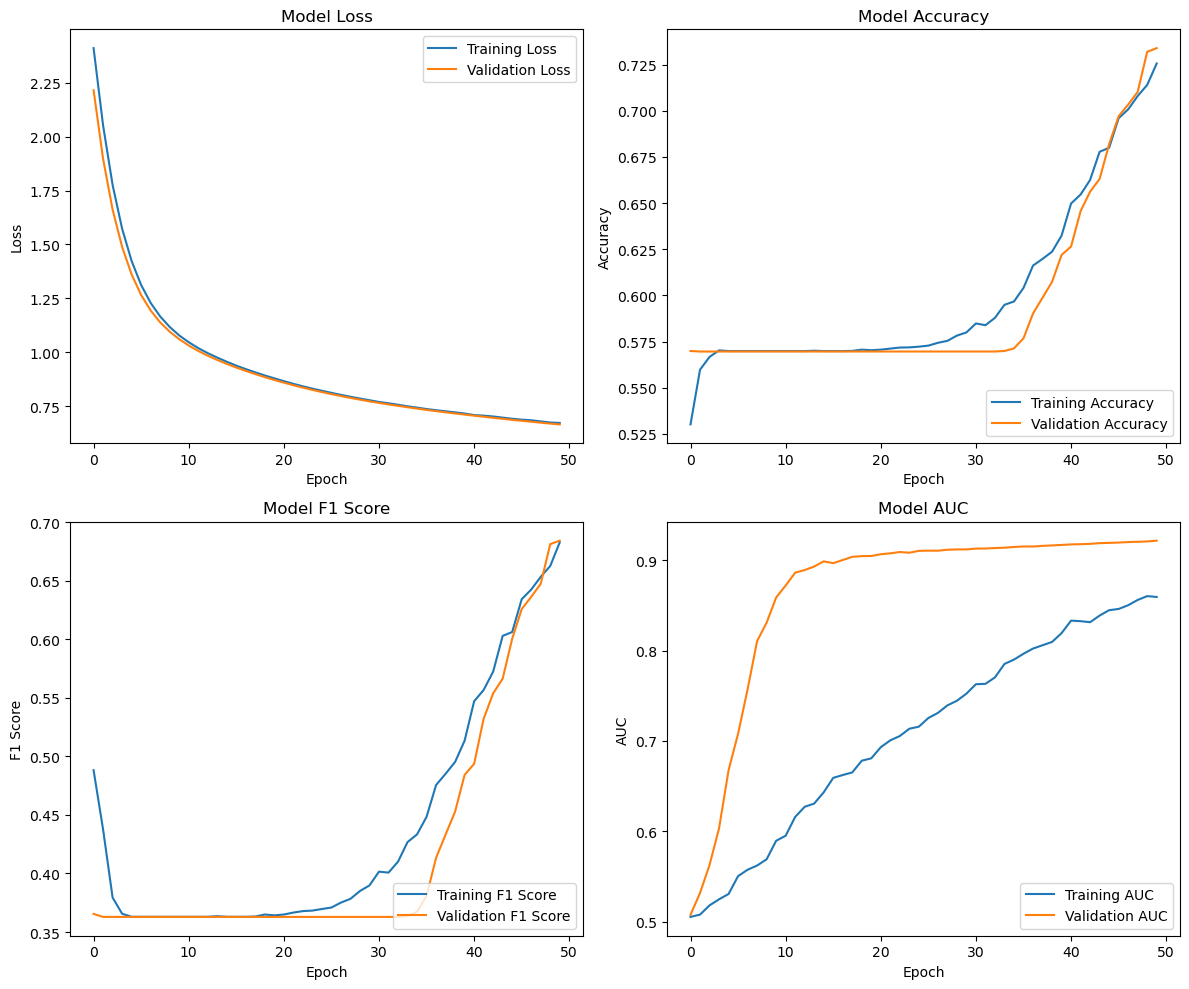

In [30]:
plot_training_history(regularized_nadam_history)

Based on the best hyperparameters for the Nadam optimizer, the model used a high dropout rate of 0.7, which may hinder its ability to fully learn the underlying patterns in the dataset. The slight imbalance of the dataset (more negative reviews than positive ones) might be a cause for the low F1-score of the optimizer, suggesting a lack of effective handling of minority classes and that the model is misclassifying certain classes. Despite the integration of the Nesterov momentum, Nadam still does not outperform Adam in this case and improvements (e.g. addressing class imbalance, lower dropout rates etc.) must be made to yield better results.

#### Comparison of results (Different optimizers) 

In [31]:
# Compare the results from different optimizers (Adam vs. RMSprop vs. Nadam)
optimizers_models_perf = {
    "Model": ["Adam", "RMSprop", "Nadam"], 
    "Accuracy": [regularized_scores[1], regularized_rmsprop_scores[1], regularized_nadam_scores[1]], 
    "F1-Score": [regularized_scores[2], regularized_rmsprop_scores[2], regularized_nadam_scores[2]],
    "AUC-ROC": [regularized_scores[3], regularized_rmsprop_scores[3], regularized_nadam_scores[3]], 
    "Dropout": [regularized_best_params['dropout'], regularized_rmsprop_best_params['dropout'], regularized_nadam_best_params['dropout']], 
    "Alpha": [regularized_best_params['alpha'], regularized_rmsprop_best_params['alpha'], regularized_nadam_best_params['alpha']]
}

# Creating a DataFrame for the analysis table
optimizers_models_perf_df = pd.DataFrame(optimizers_models_perf)
optimizers_models_perf_df

,Model,Accuracy,F1-Score,AUC-ROC,Dropout,Alpha
0,Adam,0.862818,0.860062,0.934747,0.3,0.00001
1,RMSprop,0.569591,0.362891,0.507800,0.3,0.00010
2,Nadam,0.569020,0.362659,0.513729,0.7,0.01000


### Different activation functions

The **ReLU (Rectified Linear Unit)** activation function is used by default for each hidden layer in both the baseline and regularized models. Widely used in most neural networks especially deep learning, the ReLU function is defined mathematically as such:

$$
f(x) = max(0,x)
$$

For any input $x$, if $x$ is positive, ReLU returns $x$ and if $x$ is negative or zero, it returns zero. This introduces sparsity into the neural network, meaning that only a subset of neurons are activated at any given time. Thus, this makes the model computationally efficient and can lead to faster convergence during training because the number of active neurons decreases.

#### Sigmoid activation

Also known as the logistic function, the Sigmoid activation function is widely used in binary classification problems and is mathematically defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

where:
- $x$ is the input to the function
- $e$ is Euler's number (approximately 2.718)

The output of the Sigmoid function is always between 0 and 1, i.e., $\sigma(x) \in (0, 1)$, making the function useful for models that need to predict probabilities (e.g. binary classification). The function itself is smooth and differentiable, allowing it to compute gradients for optimization algorithms easily. 

One major issue that the Sigmoid activation function encounters is the vanishing gradient problem. As the network depth or sequence length increases, the gradient magnitude is expected to decrease or grow uncontrollably, slowing the training process [11]. Since the gradient of the function tends to zero as the input moves toward large positive or negative values, the function results in slower convergence especially in deeper layers of the model. 

In [32]:
# Define the Sigmoid model with hyperparameters
sigmoid_model = Sequential([
    Dense(64, kernel_regularizer=l2(0.01), activation='sigmoid', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, kernel_regularizer=l2(0.01), activation='sigmoid'),
    Dropout(0.5),
    Dense(output_classes, activation='sigmoid')  # Output layer for binary classification
])

# Use the cross-validation function to find the best hyperparameters
sigmoid_cv_results = cross_validation(X_train_tfidf, y_train, cv=5, 
                                    model=sigmoid_model, param_grid=param_grid, 
                                    loss=loss, metrics=metrics, 
                                    epochs=75, callbacks=callbacks, 
                                    seed=42)
 
# Find the best hyperparameters
sigmoid_best_params = max(sigmoid_cv_results, key=lambda k:sigmoid_cv_results[k][2])
regularized_sigmoid_best_score = sigmoid_cv_results[sigmoid_best_params]

# Load best_params string into Python Dictionary
regularized_sigmoid_best_params = eval(sigmoid_best_params)

print(f"Sigmoid - Best Hyperparameters: {regularized_sigmoid_best_params}")
print(f"Sigmoid - Best Score: {regularized_sigmoid_best_score}")

C:\Users\Marcus Tan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Sigmoid - Best Hyperparameters: {'learning_rate': 0.0001, 'dropout': 0.3, 'alpha': 0.01, 'batch_size': 256}
Sigmoid - Best Score: [0.56983634 0.3629778  0.50116827]


In [33]:
# Build the regularized model with Sigmoid activation function
regularized_sigmoid_model = Sequential([
    Dense(64, kernel_regularizer=l2(regularized_sigmoid_best_params['alpha']), activation='sigmoid', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(regularized_sigmoid_best_params['dropout']),
    Dense(64, kernel_regularizer=l2(regularized_sigmoid_best_params['alpha']), activation='sigmoid'),
    Dropout(regularized_sigmoid_best_params['dropout']),
    Dense(output_classes, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Sigmoid activation
regularized_sigmoid_model.compile(optimizer=Adam(learning_rate=regularized_sigmoid_best_params['learning_rate']), 
                               loss='binary_crossentropy', 
                               metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])

# Train the regularized model with Sigmoid activation
regularized_sigmoid_history = regularized_sigmoid_model.fit(X_train_tfidf, y_train, 
                                                      epochs=epochs * 2, 
                                                      batch_size=regularized_sigmoid_best_params['batch_size'], 
                                                      validation_data=(X_val_tfidf, y_val), 
                                                      callbacks=callbacks, verbose=0)

# Evaluate the regularized model with Sigmoid activation
regularized_sigmoid_scores = regularized_sigmoid_model.evaluate(X_test_tfidf, y_test, verbose=0)

# Display the evaluation metrics
print(f"Regularized Sigmoid Model - Performance Metrics")
print(f"Accuracy: {regularized_sigmoid_scores[1]: .2f}")
print(f"F1 Score: {regularized_sigmoid_scores[2]: .2f}")
print(f"AUC-ROC: {regularized_sigmoid_scores[3]: .2f}")

Regularized Sigmoid Model - Performance Metrics
Accuracy:  0.43
F1 Score:  0.30
AUC-ROC:  0.51


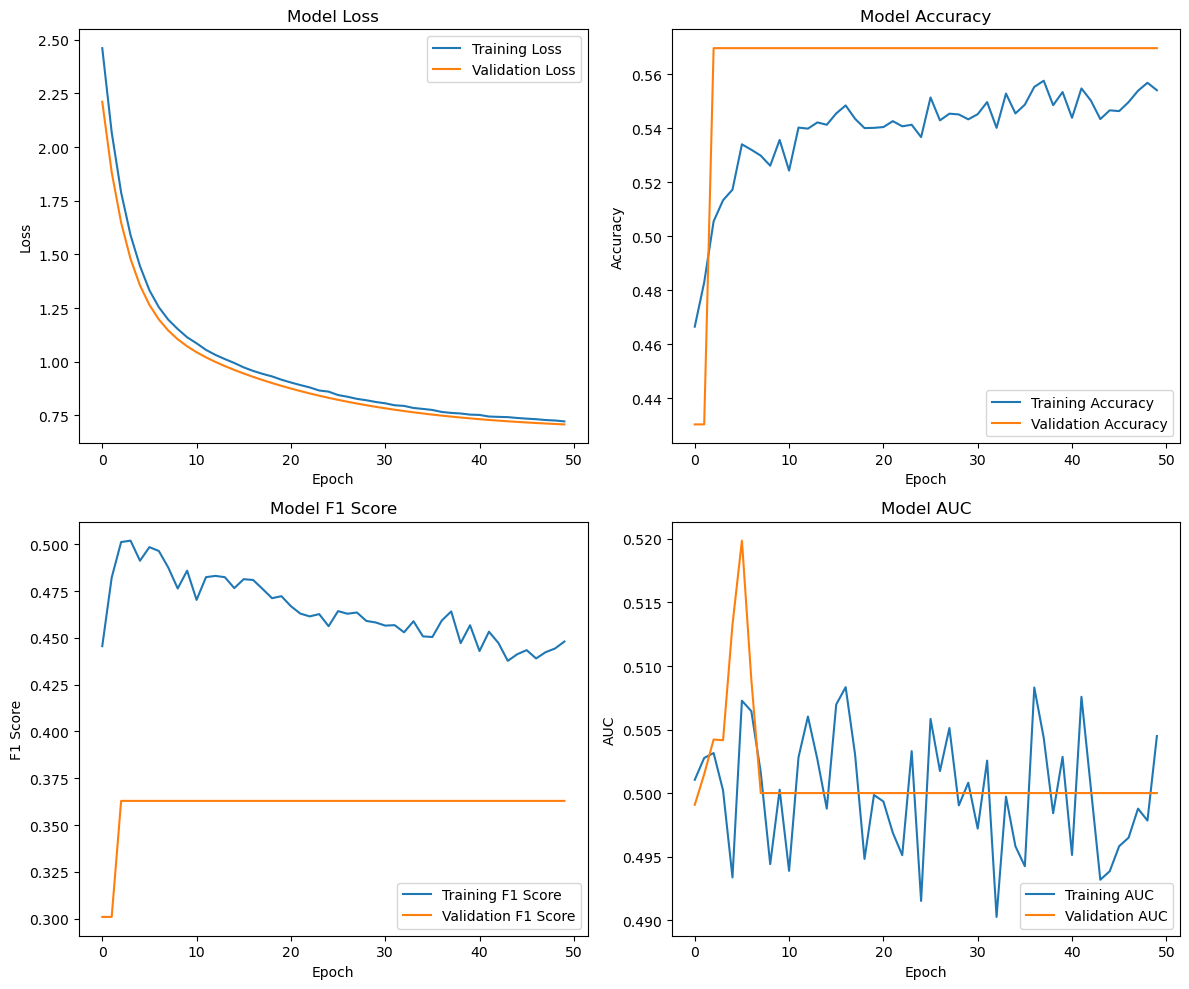

In [34]:
plot_training_history(regularized_sigmoid_history)

The output range of the Sigmoid function is non-zero centered, which causes neurons in the deeper layers to only receive positive values, potentially reducing the model's flexibility and learning capability. Unfortunately, after the regularization process, the trained model is not responding to changes of the input after about 4 - 5 epochs as shown above. Therefore, Sigmoid is too limited for modern deep networks as its saturating nature causes slow learning and limits the complexity of representations.

#### Swish activation 

The Swish activation function is a relatively recent development in the field of deep learning, proposed by researchers at Google [12]. Unlike traditional activation functions like ReLU or Sigmoid, Swish offers a smooth and non-monotonic curve that has been shown to outperform other activation functions in certain deep learning tasks. 

It is mathematically defined as:

$$
\text{Swish}(x) = x \cdot \sigma(x) = \frac{x}{1 + e^{-x}}
$$

where:
- $x$ is the input to the activation function
- $\sigma(x)$ is the sigmoid function

Swish combines the properties of identity (where $x$ is passed through) and a squashing function (sigmoid), meaning it retains small negative values to pass through and moderates the positive values based on the sigmoid weighting. This avoids the issue of "dead neurons" and helps in maintaining better gradient flow compared to both ReLU and Sigmoid. 

While being more flexible and capable of learning complex relationships, the computation of both $x$ and the sigmoid function $\sigma(x)$ adds a computational overhead and is not always guaranteed to perform better than ReLU, making it only suitable in specific deep learning tasks. .

In [35]:
from tensorflow.keras.activations import swish

# Define the swish model with hyperparameters
swish_model = Sequential([
    Dense(64, kernel_regularizer=l2(0.01), activation=swish, input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(64, kernel_regularizer=l2(0.01), activation=swish),
    Dropout(0.5),
    Dense(output_classes, activation='sigmoid') # Output layer for binary classification
])

# Use the cross-validation function to find the best hyperparameters
swish_cv_results = cross_validation(X_train_tfidf, y_train, cv=5, 
                                    model=swish_model, param_grid=param_grid, 
                                    loss=loss, metrics=metrics, 
                                    epochs=75, callbacks=callbacks, 
                                    seed=42)

# Find the best hyperparameters
swish_best_params = max(swish_cv_results, key=lambda k:swish_cv_results[k][2])
regularized_swish_best_score = swish_cv_results[swish_best_params]

# Load best_params string into Python Dictionary
regularized_swish_best_params = eval(swish_best_params)

print(f"Swish - Best Hyperparameters: {regularized_swish_best_params}")
print(f"Swish - Best Score: {regularized_swish_best_score}")

Swish - Best Hyperparameters: {'learning_rate': 0.0001, 'dropout': 0.3, 'alpha': 0.0001, 'batch_size': 256}
Swish - Best Score: [0.56983634 0.3629778  0.50232964]


In [36]:
# Build the regularized model with swish activation function
regularized_swish_model = Sequential([
    Dense(64, kernel_regularizer=l2(regularized_swish_best_params['alpha']), activation=swish, input_shape=(X_train_tfidf.shape[1],)),
    Dropout(regularized_swish_best_params['dropout']),
    Dense(64, kernel_regularizer=l2(regularized_swish_best_params['alpha']), activation=swish),
    Dropout(regularized_swish_best_params['dropout']),
    Dense(output_classes, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with swish activation
regularized_swish_model.compile(optimizer=Adam(learning_rate=regularized_swish_best_params['learning_rate']), 
                               loss='binary_crossentropy', 
                               metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])

# Train the regularized model with swish activation
regularized_swish_history = regularized_swish_model.fit(X_train_tfidf, y_train, 
                                                      epochs=epochs * 2, 
                                                      batch_size=regularized_swish_best_params['batch_size'], 
                                                      validation_data=(X_val_tfidf, y_val), 
                                                      callbacks=callbacks, verbose=0)

# Evaluate the regularized model with swish activation
regularized_swish_scores = regularized_swish_model.evaluate(X_test_tfidf, y_test, verbose=0)

# Display the evaluation metrics
print(f"Regularized Swish Model - Performance Metrics")
print(f"Accuracy: {regularized_swish_scores[1]: .2f}")
print(f"F1 Score: {regularized_swish_scores[2]: .2f}")
print(f"AUC-ROC: {regularized_swish_scores[3]: .2f}")

Regularized Swish Model - Performance Metrics
Accuracy:  0.57
F1 Score:  0.36
AUC-ROC:  0.67


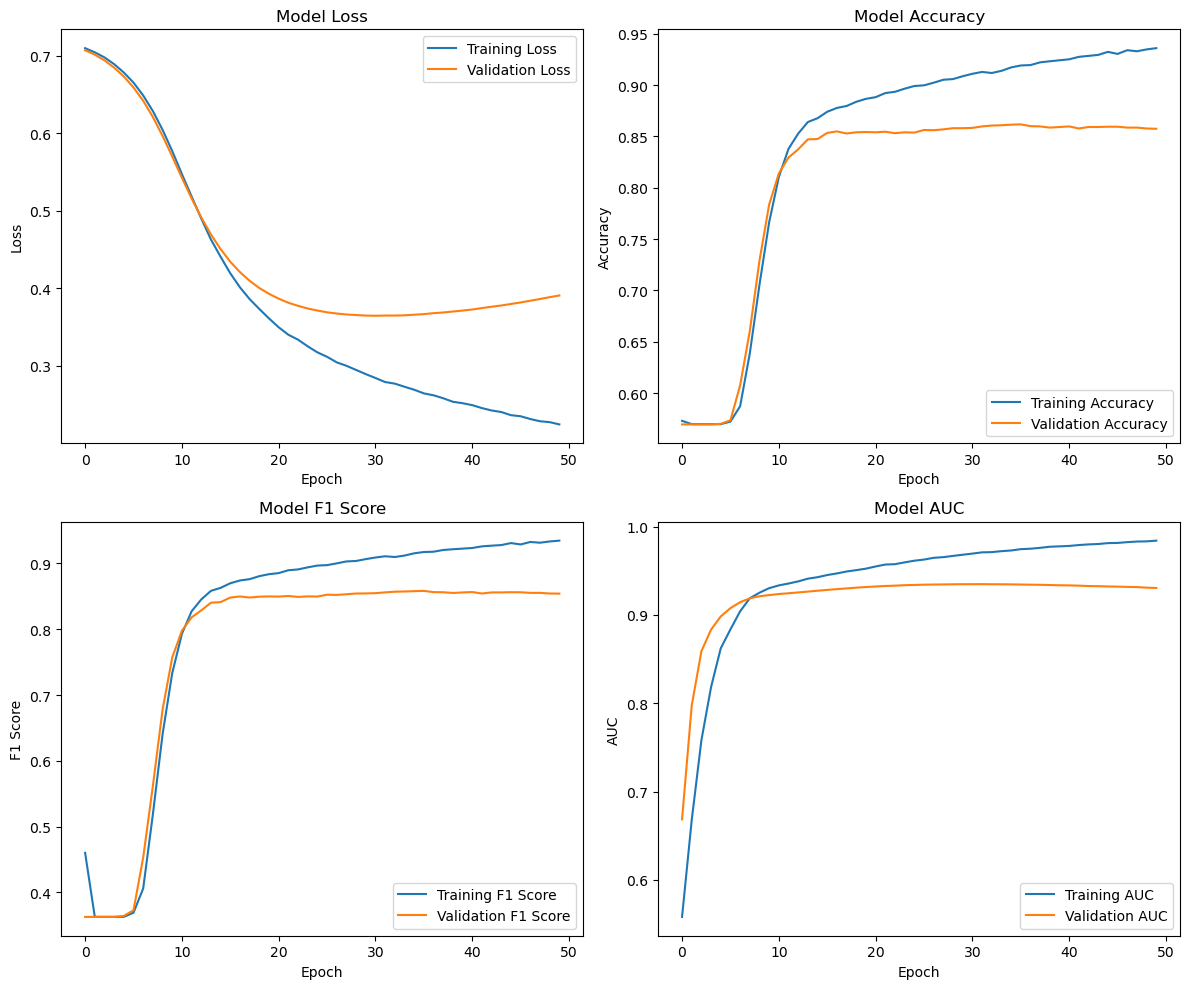

In [37]:
plot_training_history(regularized_swish_history)

In this case, the current model architecture may not be complex enough to take full advantage of Swish, which only performs better in deeper or wider networks where the smoothness and non-monotonic properties can help capture more complex patterns. The validation loss decreased initially but plateaued after about 10 epochs, suggesting that the model has learned the patterns from the training data but has not improved after due to possible overfitting or poor generalization. Hence, unless when fine-tuned, Swish can be outperformed by ReLU, a simpler and more computationally efficient activation function.

In [38]:
# Compare the results from different activation functions (ReLU vs. Sigmoid vs. Swish)
activation_models_perf = {
    "Model": ["ReLU", "Sigmoid", "Swish"], 
    "Accuracy": [regularized_scores[1], regularized_sigmoid_scores[1], regularized_swish_scores[1]], 
    "F1-Score": [regularized_scores[2], regularized_sigmoid_scores[2], regularized_swish_scores[2]],
    "AUC-ROC": [regularized_scores[3], regularized_sigmoid_scores[3], regularized_swish_scores[3]], 
    "Dropout": [regularized_best_params['dropout'], regularized_sigmoid_best_params['dropout'], regularized_swish_best_params['dropout']], 
    "Alpha": [regularized_best_params['alpha'], regularized_sigmoid_best_params['alpha'], regularized_swish_best_params['alpha']]
}

# Creating a DataFrame for the analysis table
activation_models_perf_df = pd.DataFrame(activation_models_perf)
activation_models_perf_df

,Model,Accuracy,F1-Score,AUC-ROC,Dropout,Alpha
0,ReLU,0.862818,0.860062,0.934747,0.3,0.00001
1,Sigmoid,0.430123,0.300759,0.508297,0.3,0.01000
2,Swish,0.569877,0.363007,0.672891,0.3,0.00010


### Different neurons per layer

In the context of deep learning, "wider" and "narrower" models refer to the number of neurons in the hidden layers of a neural network. 

**Wider** model:
- More neurons per layer (usually double or triple the number of neurons compared to the base model) 
- Capable of learning more complex patterns but also risks overfitting if not controlled properly


**Narrower** model:
- Fewer neurons per layer
- Can reduce risk of overfitting, but potentially missing out on learning complex patterns in the data

The Dense layers of the base model have 64 neurons each. For the wider model, the number of neurons per layer has doubled while for the narrower model, the number of neurons per layer is halved.

In [39]:
# Wider model 
wider_model = Sequential([
    Dense(128, kernel_regularizer=l2(0.01), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(128, kernel_regularizer=l2(0.01), activation='relu'), 
    Dropout(0.5),
    Dense(output_classes, activation='sigmoid') # Output layer for binary classification
])

# Narrower model
narrower_model = Sequential([
    Dense(32, kernel_regularizer=l2(0.01), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),
    Dense(32, kernel_regularizer=l2(0.01), activation='relu'), 
    Dropout(0.5),
    Dense(output_classes, activation='sigmoid') # Output layer for binary classification
])

C:\Users\Marcus Tan\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Wider model (More neurons)

In [40]:
# Use the cross-validation function to find the best hyperparameters
wider_cv_results = cross_validation(X_train_tfidf, y_train, 
                                  cv=5, model=wider_model, 
                                  param_grid=param_grid, 
                                  loss=loss, metrics=metrics, 
                                  epochs=75, callbacks=callbacks, 
                                  seed=42)

# Find the best hyperparameters
wider_best_params = max(wider_cv_results, key=lambda k:wider_cv_results[k][2])
regularized_wider_best_score = wider_cv_results[wider_best_params]

# Load best_params string into Python Dictionary
regularized_wider_best_params = eval(wider_best_params)

print(f"Wider Model - Best Hyperparameters: {regularized_wider_best_params}")
print(f"Wider Model - Best Score: {regularized_wider_best_score}")

Wider Model - Best Hyperparameters: {'learning_rate': 0.0001, 'dropout': 0.7, 'alpha': 0.001, 'batch_size': 256}
Wider Model - Best Score: [0.57002678 0.37172703 0.51675421]


Regularized Wider Model - Performance Metrics
Accuracy:  0.57
F1 Score:  0.36
AUC-ROC:  0.58


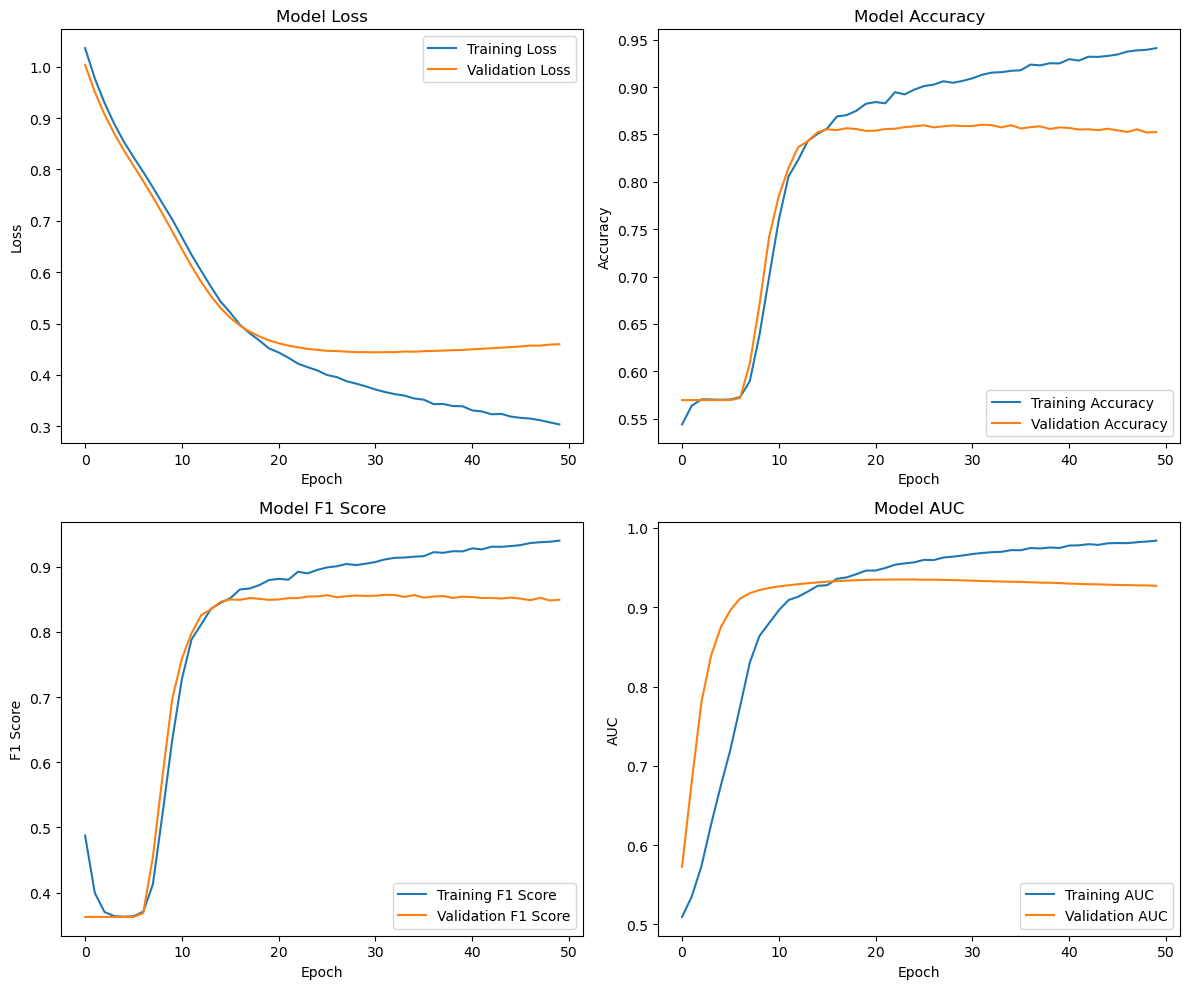

In [41]:
# Build the regularized wider model 
regularized_wider_model = Sequential([
    Dense(128, kernel_regularizer=l2(regularized_wider_best_params['alpha']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(regularized_wider_best_params['dropout']),
    Dense(128, kernel_regularizer=l2(regularized_wider_best_params['alpha']), activation='relu'), 
    Dropout(regularized_wider_best_params['dropout']),
    Dense(output_classes, activation='sigmoid')
])

# Compile the regularized model
regularized_wider_model.compile(optimizer=Adam(learning_rate=regularized_wider_best_params['learning_rate']), 
                          loss='binary_crossentropy', 
                          metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])

# Train the regularized model
regularized_wider_history = regularized_wider_model.fit(X_train_tfidf, y_train, 
                                        epochs=epochs * 2, 
                                        batch_size=regularized_wider_best_params['batch_size'], 
                                        validation_data=(X_val_tfidf, y_val), 
                                        callbacks=callbacks, verbose=0)

# Evaluate the regularized model
regularized_wider_scores = regularized_wider_model.evaluate(X_test_tfidf, y_test, verbose=0)

# Display the evaluation metrics
print(f"Regularized Wider Model - Performance Metrics")
print(f"Accuracy: {regularized_wider_scores[1]: .2f}")
print(f"F1 Score: {regularized_wider_scores[2]: .2f}")
print(f"AUC-ROC: {regularized_wider_scores[3]: .2f}")

plot_training_history(regularized_wider_history)

The wider model’s poor performance can be attributed to its large capacity, resulting in overfitting. Although it has a stronger regularization ('dropout rate': 0.7, 'alpha': 0.001), the increase in the number of neurons in each layer adds unnecessary complexity to the model for the dataset, causing it to learn noise rather than meaningful patterns. The plots for both model accuracy and F1-score display very slight instabilities, indicating the model learned a bit of noise during the training process.

#### Narrower model (Less Neurons)

In [42]:
# Use the cross-validation function to find the best hyperparameters
narrower_cv_results = cross_validation(X_train_tfidf, y_train, 
                                  cv=5, model=narrower_model, 
                                  param_grid=param_grid, 
                                  loss=loss, metrics=metrics, 
                                  epochs=75, callbacks=callbacks, 
                                  seed=42)

# Find the best hyperparameters
narrower_best_params = max(narrower_cv_results, key=lambda k:narrower_cv_results[k][2])
regularized_narrower_best_score = narrower_cv_results[narrower_best_params]

# Load best_params string into Python Dictionary
regularized_narrower_best_params = eval(narrower_best_params)

print(f"Narrower Model - Best Hyperparameters: {regularized_narrower_best_params}")
print(f"Narrower Model - Best Score: {regularized_narrower_best_score}")

Narrower Model - Best Hyperparameters: {'learning_rate': 0.0001, 'dropout': 0.3, 'alpha': 0.0001, 'batch_size': 256}
Narrower Model - Best Score: [0.56726404 0.37067918 0.51977684]


Regularized Narrower Model - Performance Metrics
Accuracy:  0.57
F1 Score:  0.36
AUC-ROC:  0.55


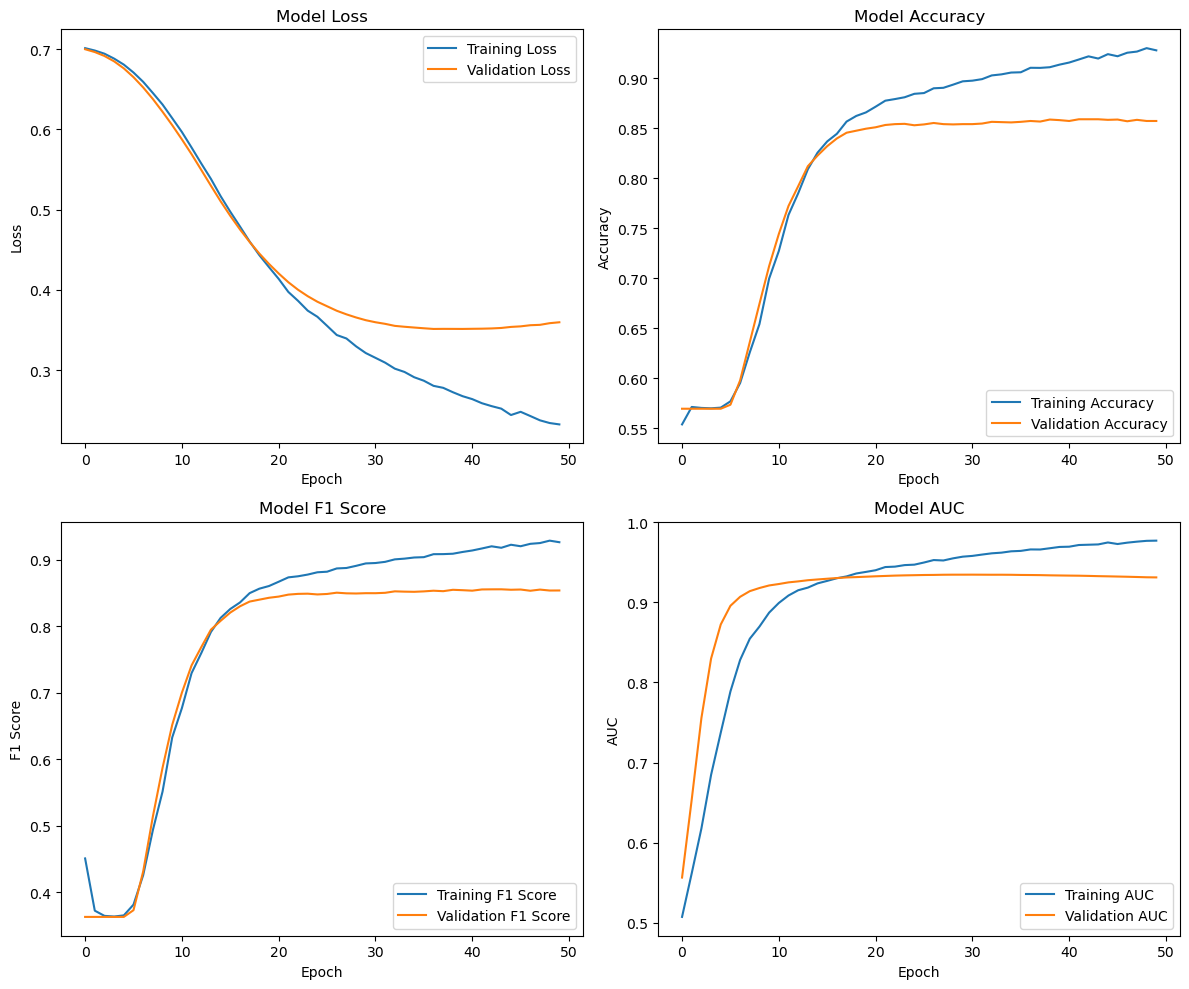

In [43]:
# Build the regularized narrower model 
regularized_narrower_model = Sequential([
    Dense(32, kernel_regularizer=l2(regularized_narrower_best_params['alpha']), activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(regularized_narrower_best_params['dropout']),
    Dense(32, kernel_regularizer=l2(regularized_narrower_best_params['alpha']), activation='relu'), 
    Dropout(regularized_narrower_best_params['dropout']),
    Dense(output_classes, activation='sigmoid')
])

# Compile the regularized model
regularized_narrower_model.compile(optimizer=Adam(learning_rate=regularized_narrower_best_params['learning_rate']), 
                          loss='binary_crossentropy', 
                          metrics=['accuracy', F1Score(name='f1_score', average='macro'), AUC(name='auc', multi_label=True)])

# Train the regularized model
regularized_narrower_history = regularized_narrower_model.fit(X_train_tfidf, y_train, 
                                        epochs=epochs * 2, 
                                        batch_size=regularized_narrower_best_params['batch_size'], 
                                        validation_data=(X_val_tfidf, y_val), 
                                        callbacks=callbacks, verbose=0)

# Evaluate the regularized model
regularized_narrower_scores = regularized_narrower_model.evaluate(X_test_tfidf, y_test, verbose=0)

# Display the evaluation metrics
print(f"Regularized Narrower Model - Performance Metrics")
print(f"Accuracy: {regularized_narrower_scores[1]: .2f}")
print(f"F1 Score: {regularized_narrower_scores[2]: .2f}")
print(f"AUC-ROC: {regularized_narrower_scores[3]: .2f}")

plot_training_history(regularized_narrower_history)

The narrower model suffers from underfitting despite having the optimal hyperparameters ('dropout rate': 0.3, 'alpha': 0.0001). While it has fewer parameters, which reduces the risk of overfitting, it does not have enough capacity to effectively capture patterns in the data, leading to poor performance on both the training and validation data.

In [44]:
# Compare the results of different neurons per layer (Regularized vs. Wider vs. Narrower)
diff_neuron_models_perf = {
    "Model": ["Regularized", "Wider", "Narrower"], 
    "Accuracy": [regularized_scores[1], regularized_wider_scores[1], regularized_narrower_scores[1]], 
    "F1-Score": [regularized_scores[2], regularized_wider_scores[2], regularized_narrower_scores[2]],
    "AUC-ROC": [regularized_scores[3], regularized_wider_scores[3], regularized_narrower_scores[3]], 
    "Dropout": [regularized_best_params['dropout'], regularized_wider_best_params['dropout'], regularized_narrower_best_params['dropout']], 
    "Alpha": [regularized_best_params['alpha'], regularized_wider_best_params['alpha'], regularized_narrower_best_params['alpha']]
}

# Creating a DataFrame for the analysis table
diff_neuron_models_perf_df = pd.DataFrame(diff_neuron_models_perf)
diff_neuron_models_perf_df

,Model,Accuracy,F1-Score,AUC-ROC,Dropout,Alpha
0,Regularized,0.862818,0.860062,0.934747,0.3,0.00001
1,Wider,0.569877,0.363007,0.578280,0.7,0.00100
2,Narrower,0.569877,0.363007,0.551728,0.3,0.00010


After experimenting with wider and narrower architectures, the base regularized model still performs the best as it strikes the optimal balance between capacity (64 neurons per layer) and regularization ('dropout': 0.3, 'alpha': 0.00001), demonstrating strong generalization capabilities.

## Conclusions

In this report, the effectiveness of various deep learning models and optimization techniques are explored for sentiment analysis on Steam game reviews. The experiments involved evaluating the performance of models with various optimization techniques, activation functions and neurons per model layer. These models were evluated using key metrics such as accuracy, F1 score and AUC-ROC, with a common goal of preventing overfitting.

The **baseline model** (MLP) has shown strong performance in balancing precision and recall while distinguishing between classes. With the help of early stopping, the model has maintained its generalization capability without overfitting. Hence, it provides a strong foundation for further tuning or comparision with more complex models.

Through extensive experimentation, several key findings and insights emerged from this. It was observed that the **Adam optimizer**  consistently outperformed RMSprop and Nadam in terms of both accuracy and AUC-ROC scores, making it the most effective optimizer for this specific task. Its ability to adaptively adjust the learning rate for each parameter facilitated faster convergence and better generalization across the validation data—an essential feature for sentiment analysis tasks, where textual data can exhibit high variability.

During the cross-validation process, several challenges arose, which were carefully addressed throughout the project:

- **Computational Intensity**: Given the deep network architectures and the large number of hyperparameters explored, cross-validation was computationally expensive and time-consuming. Efficient resource management and the use of early stopping helped mitigate these issues, ensuring that models did not overtrain on any given fold.

- **Hyperparameter Tuning**: The complexity of tuning multiple hyperparameters -- such as learning rate, regularization strength, and dropout rate -- made the cross-validation process challenging. The balance between avoiding overfitting and maintaining model complexity required careful adjustment of learning rates, regularization factors, and network architecture.

- **Overfitting to Validation Folds**: Overfitting remained a concern throughout the evaluation process, particularly when cross-validation results varied across different folds. To mitigate this, regularization techniques like L2 and dropout were employed to ensure that the model's complexity remained in check and generalization was not compromised.

Despite these challenges, the experimental results validated the effectiveness of **ReLU** as the primary activation function in most deep learning tasks due to its balance of performance, simplicity, and low computational cost. Although suffering from the "dying neuron" problem for negative values, ReLU avoids the vanishing gradient problem for positive values, allowing it to propagate gradients effectively during backpropagation in deep networks. Although other activation functions like Sigmoid and Swish were explored, ReLU remained the most reliable choice for this task.

These findings from this work include the superiority of the Adam optimizer, the strong performance of the baseline MLP model, and the importance of robust hyperparameter tuning to prevent overfitting. While cross-validation posed challenges related to computational costs and model variance across folds, these were effectively managed, ensuring that the models developed can generalize well to unseen data.

## Future Work

Firstly, model performance can be enhanced through implementing advanced regularization techniques (e.g. DropConnect, Stochastic Depth etc.). Unlike Dropout, DropConnect can be applied to individual model weights rather than the entire neurons, which can help in creating more robust networks. Stochastic Depth is another technique that randomly skips layers during training, which can be beneficial for very deep networks to prevent overfitting. Also, hyperparameter optimization with Bayesian Methods (e.g. Bayesian Optimization, Hyperband etc.) might further improve the model performance by systematically searching for optimal hyperparameter settings. Bayesian Optimization builds a probabilistic model to estimate the performance of different hyperparameter combinations, while Hyperband is a more efficient version of Random Search that dynamically allocates resources to promising hyperparameter settings.

Secondly, model interpretability can be increased with the addition of SHAP (SHapley Additive exPlanations) values. By interpreting the contribution of each feature to the predictions made by the neural network, this technique provides a unified measure of feature importance that is consistent and intuitive. Besides that, the usage of Integrated Gradients is known for attributing the prediction of the model to the input features, which helps in visualizing which parts of the input (e.g. words in a review) contribute most to the sentiment classification. Layer-Wise Relevance Propagation (LRP) breaks down the prediction made by the neural network and attributes the result back to the input features, offering a detailed insight into the model's decision process.

Lastly, the prediction accuracy can be improved by combining the strengths of multiple models, also known as ensemble learning. One example of this is deep ensemble, which consists of training multiple instances of the same neural network with different hyperparameter settings followed by averaging their predictions, thus reducing variance and improving robustness. Another example is using the outputs of several different models (e.g., models with different architectures or optimizers) as inputs to a meta-model, which can learn to make better predictions based on the strengths of each model.

## References
1. Comscore. (2023). "2023 State of Gaming Report". Available: https://www.comscore.com/Insights/Presentations-and-Whitepapers/2023/2023-State-of-Gaming.
<br><br>
2. Newzoo. (2023). "Global Gamer Study 2023". Available: https://gamedevreports.com/wp-content/uploads/2023/06/PRESS-COPY-Newzoo-Global-Gamer-Study-2023.pdf.
<br><br>
3. P. Agnihotri (2020). "Sentiment Analysis for Steam Reviews". Available: https://www.kaggle.com/datasets/piyushagni5/sentiment-analysis-for-steam-reviews
<br><br>
4. Tibshirani, R. (1996). Regression Shrinkage and Selection via the Lasso. Journal of the Royal Statistical Society: Series B (Methodological), 58(1), 267-288.
<br><br>
5. Hoerl, A. E., & Kennard, R. W. (1970). Ridge Regression: Applications to Nonorthogonal Problems. Technometrics, 12(1), 69-82.
<br><br>
6. Zou, H., & Hastie, T. (2005). Regularization and Variable Selection via the Elastic Net. Journal of the Royal Statistical Society: Series B (Statistical Methodology), 67(2), 301-320.
<br><br>
7. Diederik P. Kingma, Jimmy Lei Ba (2015). "Adam: A Method For Stochastic Optimization, Published as a conference paper at ICLR 2015". Available: https://arxiv.org/pdf/1412.6980
<br><br>
8. Tieleman, T. and Hinton, G. (2012) Lecture 6.5-rmsprop: Divide the Gradient by a Running Average of Its Recent Magnitude. COURSERA: Neural Networks for Machine Learning, 4, 26-31. 
<br><br>
9. Dozat, T. (2016). Incorporating Nesterov momentum into Adam. ICLR Workshop.
<br><br>
10. Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013). On the importance of initialization and momentum in deep learning. Proceedings of the 30th International Conference on Machine Learning (ICML).
<br><br>
11. S. Basodi, Ji C., Zhang H., Pan Yi (2020). "Gradient amplification: An efficient way to train deep neural networks". Available: https://ieeexplore.ieee.org/document/9142152
<br><br>
12. Ramachandran, P., Zoph, B., & Le, Q. V. (2017). "Searching for Activation Functions". Available: https://arxiv.org/pdf/1710.05941